

<h1 style="text-align: center; color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Exploratory Data Analysis (EDA) for Workers' Compensation Claims
</h1>
<hr style="border: 2px solid #4A90E2 ;">

<h2 style="text-align: center; color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    Necessary Imports
</h2>
<hr style="border: 1px solid #4A90E2 ;">

<h3 style="color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">
    Package Descriptions
</h3>
<ul style="font-family: 'Arial', sans-serif; line-height: 1.8;">
    <li><strong>pandas</strong>: For data manipulation and analysis, making it easier to read and manipulate dataframes.</li>
    <li><strong>numpy</strong>: For efficient numerical operations and array manipulation.</li>
    <li><strong>matplotlib.pyplot</strong>: For creating basic graphs and visualizations.</li>
    <li><strong>seaborn</strong>: For more attractive and informative statistical visualizations.</li>
    <li><strong>missingno</strong>: For visualizing and analyzing missing data, helping to better understand the dataset's quality.</li>
</ul>

In [807]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
from scipy import stats
import sys
import os

sys.path.append(os.path.abspath("../utils"))
from categorical_analysis import summarize_and_sample

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer


import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📂 Data Loading, Partition and Overview
</h2>

<hr style="border: 1px solid #4A90E2 ;">

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📥 Data Loading
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Data loading is the first step in the analysis, ensuring that the dataset is correctly imported and ready for processing. This step checks whether the data has been loaded without errors and is in the expected format.
</p>

In [808]:
path = "../data/"

data_train = pd.read_csv(path + "train_data.csv")
data_test = pd.read_csv(path + "test_data.csv")

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📥 Data Partition
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    
</p>

In [809]:
# Separando variáveis independentes (X) e dependente (y)
X = data_train.drop(columns=['Claim Injury Type'])
y = data_train['Claim Injury Type']

In [810]:
# Divisão inicial
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📄 Data Overview
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The data overview provides an initial snapshot of the dataset, including the structure, size, and type of variables. This summary is essential for guiding the steps of data cleaning, transformation, and exploratory analysis.
</p>

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚂 Training Data
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing the training data is essential for understanding the characteristics that will be used in building the model. Here, we explore the structure, distribution, and integrity of the data that feeds into the learning process.
</p>

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    👀 View First Rows
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Viewing the first few rows of the dataset allows for a quick check of the structure, data types, and observation of potential initial patterns. This preview helps confirm that the data loading is correct and facilitates the planning of analysis steps.
</p>

In [811]:
X_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
557080,2022-08-17,33.0,N,2022-10-26,Y,1037.00,1988.0,2022-10-25,2022-11-10,"POLICE, FIRE, SANITATION",...,81.0,"STRUCK OR INJURED, NOC",10.0,CONTUSION,35.0,HAND,11203,0.0,Not Work Related,3.0
112493,2020-04-07,56.0,N,2020-08-17,N,0.00,1963.0,2020-08-17,NaN,MEMORIAL SLOAN KETTERING,...,83.0,PANDEMIC,83.0,COVID-19,44.0,CHEST,10923,0.0,Not Work Related,2.0
524424,2022-08-26,43.0,N,2022-08-31,Y,574.17,1979.0,2022-08-31,NaN,ARCH INDEMNITY INSURANCE CO.,...,33.0,ON STAIRS,28.0,FRACTURE,38.0,SHOULDER(S),11208,0.0,Not Work Related,2.0
266382,2021-06-02,58.0,N,2021-06-07,N,0.00,1963.0,2021-06-07,NaN,STATE INSURANCE FUND,...,29.0,ON SAME LEVEL,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,14227.0,0.0,Not Work Related,6.0
568843,2022-11-10,35.0,N,2022-11-15,N,0.00,1987.0,2022-11-15,NaN,INDEMNITY INS. OF N AMERICA,...,28.0,INTO OPENINGS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,14416,0.0,Not Work Related,6.0


<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📐 Data Dimensions
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding the data dimensions is a key step in analysis. The number of rows and columns provides an overview of the dataset size, facilitating the planning of processing steps and model selection.
</p>

In [812]:
X_train.shape

(474776, 32)

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📊 Data Type Analysis
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding the data types of each column is essential for selecting the appropriate preprocessing methods and ensuring accurate analysis. Here, we identify the data types present, allowing us to adjust transformation, scaling, and encoding strategies according to the characteristics of each variable.
</p>

In [813]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474776 entries, 557080 to 121958
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       456177 non-null  object 
 1   Age at Injury                       459122 non-null  float64
 2   Alternative Dispute Resolution      459122 non-null  object 
 3   Assembly Date                       474776 non-null  object 
 4   Attorney_Representative             459122 non-null  object 
 5   Average Weekly Wage                 436192 non-null  float64
 6   Birth Year                          435850 non-null  float64
 7   C-2 Date                            447457 non-null  object 
 8   C-3 Date                            150058 non-null  object 
 9   Carrier Name                        459122 non-null  object 
 10  Carrier Type                        459122 non-null  object 
 11  Claim Identifier          

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">🔍 Missing Value Analysis</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
   Checking for missing values is an essential step to ensure data integrity before analysis. Here, we identify columns with missing values and calculate their percentage, helping to understand the need for treatment, whether through imputation, removal, or other strategies.
</p>

In [814]:
((X_train.isnull().sum() / len(X_train)) * 100).round(2)

Accident Date                           3.92
Age at Injury                           3.30
Alternative Dispute Resolution          3.30
Assembly Date                           0.00
Attorney_Representative                 3.30
Average Weekly Wage                     8.13
Birth Year                              8.20
C-2 Date                                5.75
C-3 Date                               68.39
Carrier Name                            3.30
Carrier Type                            3.30
Claim Identifier                        0.00
County of Injury                        3.30
COVID-19 Indicator                      3.30
District Name                           3.30
First Hearing Date                     74.54
Gender                                  3.30
IME-4 Count                            77.62
Industry Code                           4.98
Industry Code Description               4.98
Medical Fee Region                      3.30
OIICS Nature of Injury Description    100.00
WCIO Cause

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    🧹 Data Cleaning
</h2>
<hr style="border: 1px solid #4A90E2;">


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔍 Missing Values
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Identifying and handling missing values is essential to maintain data quality and ensure accurate analysis. This step examines the gaps in the dataset and guides the process of filling, removing, or applying other treatment strategies.
</p>

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📅 Handling Missing Dates
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Accident Date, Assembly Date, C-2 Date, C-3 Date, First Hearing Date
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Create a binary auxiliary column (e.g., <code>missing_First Hearing Date</code>) to indicate the absence of the date.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing dates may indicate that the corresponding process or action has not yet been completed, making this information relevant for analysis.
</p>

In [815]:
# Colunas de datas
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

In [816]:
def treat_date_missing_values(train_data, val_data, test_data):
    for col in date_cols:
        # Converter para datetime com erros tratados como NaT
        train_data[col] = pd.to_datetime(train_data[col], errors='coerce')
        val_data[col] = pd.to_datetime(val_data[col], errors='coerce')
        test_data[col] = pd.to_datetime(test_data[col], errors='coerce')

        # Criar coluna binária para indicar valores ausentes
        train_data['missing_' + col] = train_data[col].isnull().astype(int)
        val_data['missing_' + col] = val_data[col].isnull().astype(int)
        test_data['missing_' + col] = test_data[col].isnull().astype(int)

        # Preencher valores ausentes no treino com a data mais recente
        max_train_date = train_data[col].max()
        train_data[col].fillna(max_train_date, inplace=True)
        
        # Usar a mesma data para preencher validação e teste
        val_data[col].fillna(max_train_date, inplace=True)
        test_data[col].fillna(max_train_date, inplace=True)

    return train_data, val_data, test_data

In [817]:
X_train, X_val, data_test = treat_date_missing_values(X_train, X_val, data_test)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚧ Handling Missing Values in Gender
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Gender
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown" and create a binary auxiliary column (<code>missing_Gender</code>) to indicate the absence of original data.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing gender data can be relevant in certain analyses; using "U" preserves data integrity, and the auxiliary column provides insight into the lack of information.
</p>

In [818]:
# Calcular o valor mais frequente no treino
most_frequent_gender = X_train['Gender'].mode()[0]

In [819]:
# Preencher valores ausentes com o valor calculado
X_train['Gender'].fillna(most_frequent_gender, inplace=True)
X_val['Gender'].fillna(most_frequent_gender, inplace=True)
data_test['Gender'].fillna(most_frequent_gender, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Handling of Age at Injury
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Age at Injury
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median age.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Age can influence the type of injury. Filling in missing values with the median avoids distortion from outliers, maintaining data representativity.
</p>

In [820]:
# Calcular a mediana apenas no conjunto de treino
median_age_train = X_train['Age at Injury'].median()

In [821]:
# Preencher valores ausentes separadamente
X_train['Age at Injury'].fillna(median_age_train, inplace=True)
X_val['Age at Injury'].fillna(median_age_train, inplace=True)
data_test['Age at Injury'].fillna(median_age_train, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    💵 Handling of Average Weekly Wage
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Average Weekly Wage
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median of the average weekly wage.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Salary distribution is often skewed. The median is more robust against outliers and provides a better representation of the central tendency.
</p>

In [822]:
# Calculate the median using only the training set
median_wage_train = X_train['Average Weekly Wage'].median()

In [823]:
# Fill missing values in each dataset using the median from the training set
X_train['Average Weekly Wage'].fillna(median_wage_train, inplace=True)
X_val['Average Weekly Wage'].fillna(median_wage_train, inplace=True)
data_test['Average Weekly Wage'].fillna(median_wage_train, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📝 Handling Indicator Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Alternative Dispute Resolution, Attorney_Representative, COVID-19 Indicator
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "No" or the most frequent category, if the variable is not binary.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Variables indicating the presence of representation, arbitration, or COVID can be interpreted as "No" when missing, as they suggest the absence of these characteristics or events.
</p>

In [824]:
# Binary columns
variables_binaries_cols = ['Alternative Dispute Resolution', 'Attorney_Representative', 'COVID-19 Indicator']

In [825]:
# Function to handle binary variable missing values separately
def variables_binaries_missing_values(train, val, test):
    for col in variables_binaries_cols:
        # Fill missing values in all datasets with 'Não'
        train[col].fillna('Não', inplace=True)
        val[col].fillna('Não', inplace=True)
        test[col].fillna('Não', inplace=True)

In [826]:
# Apply to training, validation, and test sets
variables_binaries_missing_values(X_train, X_val, data_test)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🗺️ Handling Names and Locations
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Carrier Name, District Name, County of Injury
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Names of insurers, districts, and counties are informative. The value "Unknown" prevents data loss and indicates the absence of information, allowing for a comprehensive analysis.
</p>

In [827]:
# Columns with descriptive information
variables_desc_cols = ['Carrier Name', 'District Name', 'County of Injury']

In [828]:
# Function to handle descriptive variable missing values
def variables_desc_missing_values(train, val, test):
    for col in variables_desc_cols:
        # Fill missing values with 'Desconhecido' for each dataset
        train[col].fillna('Unknown', inplace=True)
        val[col].fillna('Unknown', inplace=True)
        test[col].fillna('Unknown', inplace=True)

In [829]:
variables_desc_missing_values(X_train, X_val, data_test)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📑 Handling IME-4 Form Count
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> IME-4 Count
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with 0, assuming that the absence indicates no IME-4 forms submitted.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Replacing missing values with 0 prevents incorrect interpretations and is a simple solution, as the absence likely indicates no form submission.
</p>

In [830]:
X_train['missing_IME-4_Count'] = X_train['IME-4 Count'].isnull().astype(int)
X_val['missing_IME-4_Count'] = X_val['IME-4 Count'].isnull().astype(int)
data_test['missing_IME-4_Count'] = data_test['IME-4 Count'].isnull().astype(int)

In [831]:
mean_value = X_train['IME-4 Count'].mean()
X_train['IME-4 Count'].fillna(mean_value, inplace=True)
X_val['IME-4 Count'].fillna(mean_value, inplace=True)
data_test['IME-4 Count'].fillna(mean_value, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Handling Industry Categories
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Industry Code, Industry Code Description
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with the category "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Creating an "Unknown" category for missing values prevents data loss and ensures the integrity of the analysis, allowing cases with missing industry information to be included.
</p>

In [832]:
# Columns related to industry
industry_cols = ['Industry Code', 'Industry Code Description']

In [833]:
# Fill missing values independently for training, validation, and test sets
for col in industry_cols:
    X_train[col].fillna('Unknown', inplace=True)
    X_val[col].fillna('Unknown', inplace=True)
    data_test[col].fillna('Unknown', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏥 Handling Medical Fee Region
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Medical Fee Region
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with the most frequent category.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The medical fee region is relevant information. Replacing missing values with the most frequent category preserves the integrity of the data without introducing arbitrary values.
</p>

In [834]:
for dataset in [X_train, X_val, data_test]:
    dataset['missing_Medical_Fee_Region'] = dataset['Medical Fee Region'].isnull().astype(int)

In [835]:
# Calculate the mode of 'Medical Fee Region' using only the training set
mode_medical_fee_region = X_train['Medical Fee Region'].mode()[0]

In [836]:
# Fill missing values in each dataset independently using the computed mode
X_train['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)
X_val['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)
data_test['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Handling Injury Codes (WCIO)
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> WCIO Cause of Injury, WCIO Nature of Injury, WCIO Part Of Body
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These injury codes are likely important for the analysis. The absence of data can be marked as "Unknown" without negatively affecting the model's performance.
</p>

In [837]:
# Columns related to WCIO
wcio_cols = ['WCIO Cause of Injury', 'WCIO Nature of Injury', 'WCIO Part Of Body']

In [838]:
# Fill missing values for each dataset separately
for col in wcio_cols:
    X_train[col + ' Code'].fillna(99, inplace=True)
    X_val[col + ' Code'].fillna(99, inplace=True)
    data_test[col + ' Code'].fillna(99, inplace=True)
    
    X_train[col + ' Description'].fillna("Unknown", inplace=True)
    X_val[col + ' Description'].fillna("Unknown", inplace=True)
    data_test[col + ' Description'].fillna("Unknown", inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📍 Handling Zip Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Zip Code
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with "Unknown" or with the mode.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> While the zip code may not be essential for the model, keeping it—either as "Unknown" or with the mode—helps maintain the geographical context of the data.
</p>

In [839]:
X_train['missing_Zip_Code'] = X_train['Zip Code'].isnull().astype(int)
X_val['missing_Zip_Code'] = X_val['Zip Code'].isnull().astype(int)
data_test['missing_Zip_Code'] = data_test['Zip Code'].isnull().astype(int)

In [840]:
# Fill missing values for 'Zip Code' independently for each dataset
X_train['Zip Code'].fillna('Unknown', inplace=True)
X_val['Zip Code'].fillna('Unknown', inplace=True)
data_test['Zip Code'].fillna('Unknown', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Handling Agreement Reached
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Agreement Reached
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with "No".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Many cases may not have reached an agreement without the involvement of the WCB. Using "No" as a default value is a safe assumption that prevents incorrect interpretations.
</p>

In [841]:
# Fill missing values for 'Agreement Reached' independently for each dataset
X_train['Agreement Reached'].fillna('No', inplace=True)
X_val['Agreement Reached'].fillna('No', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Tratamento de Acordos Fechados
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Coluna:</strong> Agreement Reached
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Ação:</strong> Preencher valores ausentes com "Não".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justificativa:</strong> Muitos casos podem não ter chegado a um acordo sem a participação da WCB. Usar "Não" como valor padrão é uma suposição segura que evita interpretações incorretas.
</p>


In [842]:
# Fill missing values for 'WCB Decision' independently for each dataset
X_train['WCB Decision'].fillna("Other", inplace=True)
X_val['WCB Decision'].fillna("Other", inplace=True)


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    👪 Handling Number of Dependents
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Number of Dependents
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with 0.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Assuming that missing values indicate the absence of dependents is a reasonable simplification that facilitates data handling.
</p>

In [843]:
X_train['missing_Number_of_Dependents'] = X_train['Number of Dependents'].isnull().astype(int)
X_val['missing_Number_of_Dependents'] = X_val['Number of Dependents'].isnull().astype(int)
data_test['missing_Number_of_Dependents'] = data_test['Number of Dependents'].isnull().astype(int)

In [844]:
# Fill missing values for 'Number of Dependents' independently for each dataset
X_train['Number of Dependents'].fillna(0, inplace=True)
X_val['Number of Dependents'].fillna(0, inplace=True)
data_test['Number of Dependents'].fillna(0, inplace=True)


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Handling Birth Year
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Birth Year
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The median is resistant to outliers and provides an appropriate central value for filling missing values, especially useful in skewed distributions.
</p>

In [845]:
X_train['missing_Birth_Year'] = X_train['Birth Year'].isnull().astype(int)
X_val['missing_Birth_Year'] = X_val['Birth Year'].isnull().astype(int)
data_test['missing_Birth_Year'] = data_test['Birth Year'].isnull().astype(int)

In [846]:
# Calculate the median of 'Birth Year' using only the training set
median_birth_year = X_train['Birth Year'].median()

In [847]:
# Fill missing values independently for each dataset
X_train['Birth Year'].fillna(median_birth_year, inplace=True)
X_val['Birth Year'].fillna(median_birth_year, inplace=True)
data_test['Birth Year'].fillna(median_birth_year, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🗑️ Removal of OIICS Nature of Injury Description Column
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> OIICS Nature of Injury Description
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Remove the column from the dataset.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The column is entirely composed of missing values, making its presence in the dataset irrelevant for analysis.
</p>

In [848]:
# Drop the column independently for each dataset
X_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
X_val.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
data_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Handling and Treatment of Missing Values in the Training Dataset
</h2>

In [849]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Handling Duplicate Values
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Identify and remove duplicate values from the dataset to prevent the model from being influenced by redundant data.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Duplicate rows can introduce bias and distort the analysis results. Removing duplicates helps ensure the accuracy of the model by using only unique and representative data.
</p>

In [850]:
# Remover duplicados do conjunto de treino
print(f"Duplicados em X_train antes da remoção: {X_train.duplicated().sum()}")
X_train = X_train.drop_duplicates()
print(f"Duplicados em X_train após a remoção: {X_train.duplicated().sum()}")

Duplicados em X_train antes da remoção: 0
Duplicados em X_train após a remoção: 0


In [851]:
# Remover duplicados do conjunto de validação
print(f"Duplicados em X_val antes da remoção: {X_val.duplicated().sum()}")
X_val = X_val.drop_duplicates()
print(f"Duplicados em X_val após a remoção: {X_val.duplicated().sum()}")

Duplicados em X_val antes da remoção: 0
Duplicados em X_val após a remoção: 0


<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Conclusion:</strong> The check for duplicates in the <code>data_train</code> dataset resulted in a value of <strong>0</strong> duplicate rows, indicating that there are no repeated rows in the dataset. This implies that:
</p>
<ul style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>No Action Needed:</strong> Since there are no duplicates, no action is required to remove duplicate rows.</li>
    <li><strong>Data Quality:</strong> The absence of duplicates suggests that the data is well-structured and organized, with no redundancies that compromise the integrity of the information.</li>
</ul>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Based on this, we can proceed to other data preparation steps, such as handling missing values and transformations, without the need for additional adjustments regarding duplicates.
</p>

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Data Type Conversion
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert data types as needed to optimize memory and ensure accuracy in analysis. This includes transforming numerical variables to categories and converting dates to the <code>datetime</code> format.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Data type conversion helps reduce memory usage and ensures that data is handled in the appropriate format, making processing and analysis easier.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion from float64 to float32
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert numerical variables from <code>float64</code> to <code>float32</code> to optimize memory usage without losing significant precision.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Reducing <code>float64</code> to <code>float32</code> decreases memory consumption, making processing more efficient, especially in large datasets, while maintaining adequate precision for most analyses.
</p>

In [852]:
float_cols = ['Age at Injury', 'Average Weekly Wage', 'Birth Year',
              'IME-4 Count', 'WCIO Cause of Injury Code',
              'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
              'Number of Dependents']

for col in float_cols:
    X_train[col] = X_train[col].astype('float32')
    X_val[col] = X_val[col].astype('float32')
    data_test[col] = data_test[col].astype('float32')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion from int64 to int32
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert integer variables from <code>int64</code> to <code>int32</code> to reduce memory consumption while keeping values within the allowed range for <code>int32</code>.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Converting from <code>int64</code> to <code>int32</code> reduces memory usage, making processing more efficient, which is especially useful in large datasets, without affecting data integrity in most cases.
</p>

In [853]:
X_train['Claim Identifier'] = X_train['Claim Identifier'].astype('int32')
X_val['Claim Identifier'] = X_val['Claim Identifier'].astype('int32')
data_test['Claim Identifier'] = data_test['Claim Identifier'].astype('int32')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion of Object Type Columns to Category
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert columns with <code>object</code> type to <code>category</code>, especially those with repeated values, to reduce memory usage and optimize processing.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> <code>Category</code> type columns are more memory-efficient for categorical data as they store repeated values as references. This conversion is particularly useful in large datasets, maintaining the same information with improved performance.
</p>

In [854]:
object_cols = ['Alternative Dispute Resolution', 'Attorney_Representative',
               'Carrier Name', 'Carrier Type',
               'County of Injury', 'COVID-19 Indicator', 'District Name',
               'Gender', 'Industry Code', 'Industry Code Description',
               'Medical Fee Region', 'WCIO Cause of Injury Description',
               'WCIO Nature of Injury Description', 'WCIO Part Of Body Description',
               'Zip Code']

for col in object_cols:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')
    data_test[col] = data_test[col].astype('category')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion of Missing Value Indicator Columns to int8
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert binary columns indicating missing values to the <code>int8</code> type, saving memory space without losing information.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing value indicator columns contain only 0 or 1, and the <code>int8</code> type is sufficient to store these values. This conversion optimizes memory usage, especially in large datasets with multiple binary indicator columns.
</p>

In [855]:
missing_cols = [col for col in X_train.columns if col.startswith('missing_')]

In [856]:
# Converter as colunas identificadas para int8 em cada conjunto
for col in missing_cols:
    X_train[col] = X_train[col].astype('int8')
    X_val[col] = X_val[col].astype('int8')
    data_test[col] = data_test[col].astype('int8')

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Descriptive Statistics
</h2>
<hr style="border: 1px solid #4A90E2;">

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Descriptive Statistics for Numerical Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section provides a statistical summary of the numerical variables, including measures such as mean, median, standard deviation, and minimum and maximum values. These statistics help to understand the distribution and variability of the numerical data.
</p>

In [857]:
X_train.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Claim Identifier,First Hearing Date,IME-4 Count,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
count,474776,474776.000000,474776,4.747760e+05,474776.000000,474776,474776,4.747760e+05,474776,474776.000000,...,474776.000000,474776.0,474776.000000,474776.000000,474776.000000,474776.000000,474776.000000,474776.000000,474776.000000,474776.000000
mean,2021-06-01 14:33:41.500665600,42.123074,2021-07-19 03:41:03.652754688,4.508694e+02,1893.994385,2021-09-15 05:59:22.330025728,2023-07-06 19:20:24.486494208,2.379536e+07,2023-11-13 10:38:24.541089024,3.211458,...,0.039174,0.0,0.057541,0.683939,0.745448,0.776244,0.032971,0.081419,0.032971,0.081988
min,1961-09-06 00:00:00,0.000000,2020-01-01 00:00:00,0.000000e+00,0.000000,1996-01-12 00:00:00,1992-11-13 00:00:00,5.393066e+06,2020-01-30 00:00:00,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-09-25 00:00:00,31.000000,2020-10-26 00:00:00,0.000000e+00,1966.000000,2020-11-24 00:00:00,2022-06-06 00:00:00,5.593209e+06,2024-03-07 00:00:00,3.211458,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-07-20 00:00:00,42.000000,2021-07-30 00:00:00,0.000000e+00,1977.000000,2021-09-09 00:00:00,2024-05-30 00:00:00,5.791382e+06,2024-06-07 00:00:00,3.211458,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-04-25 00:00:00,53.000000,2022-04-19 00:00:00,7.606450e+02,1988.000000,2022-06-10 00:00:00,2024-05-30 00:00:00,5.991362e+06,2024-06-07 00:00:00,3.211458,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2023-09-29 00:00:00,117.000000,2022-12-31 00:00:00,2.828079e+06,2018.000000,2024-06-01 00:00:00,2024-05-30 00:00:00,9.998917e+08,2024-06-07 00:00:00,73.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,14.023633,NaN,6.183989e+03,398.412750,NaN,NaN,1.082829e+08,NaN,1.343916,...,0.194010,0.0,0.232873,0.464937,0.435609,0.416761,0.178562,0.273478,0.178562,0.274347


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Descriptive Statistics for Categorical Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section provides a summary of the categorical variables, including the frequency and proportion of each category. These statistics are useful for understanding the distribution of categorical data and identifying patterns or imbalances in the classes.
</p>

In [858]:
categorical_cols = X_train.select_dtypes(include='category').columns.to_list()
categorical_cols

['Alternative Dispute Resolution',
 'Attorney_Representative',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Industry Code',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Description',
 'WCIO Part Of Body Description',
 'Zip Code']

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Alternative Dispute Resolution (ADR)
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Alternative Dispute Resolution (ADR)</code> variable indicates whether an alternative mechanism, such as mediation or arbitration, was used to resolve the dispute.
</p>

In [859]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[0])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Alternative Dispute Resolution (ADR)</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [860]:
value_counts_df.head()

,Alternative Dispute Resolution,Counts,Percentage
0,N,457034,96.263080
1,Não,15654,3.297134
2,Y,2084,0.438944
3,U,4,0.000843


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Alternative Dispute Resolution (ADR)</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [861]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
406723,2020-12-16,25.0,N,2020-12-17,N,0.0,1995.0,2020-12-17,2024-05-30,ACADIA INSURANCE COMPANY,...,0,0,0,1,1,1,0,0,0,0
125154,2022-05-20,15.0,N,2022-05-23,N,0.0,2007.0,2022-06-06,2022-05-21,UTICA SPECIALTY RISK INSURANCE,...,0,0,0,0,1,1,0,0,0,0
120037,2021-03-01,56.0,N,2021-03-12,N,0.0,1964.0,2021-03-11,2024-05-30,NYU LANGONE HOSPITALS,...,0,0,0,1,1,1,0,0,0,0
318553,2022-11-16,35.0,N,2022-11-18,N,0.0,1987.0,2022-11-18,2024-05-30,A I U INSURANCE COMPANY,...,0,0,0,1,1,1,0,0,0,0
352505,2022-10-04,52.0,N,2022-10-11,N,0.0,1970.0,2022-10-11,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Attorney Representative
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Attorney Representative</code> variable indicates whether the claimant had legal representation during the process, which can affect the outcome of the case.
</p>

In [862]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[1])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Attorney Representative</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [863]:
value_counts_df.head()

,Attorney_Representative,Counts,Percentage
0,N,313507,66.032613
1,Y,145615,30.670253
2,Não,15654,3.297134


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Attorney Representative</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [864]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
35176,2021-05-20,37.0,N,2021-05-26,N,0.000000,1983.0,2021-05-26,2024-05-30,HARTFORD UNDERWRITERS INS CO,...,0,0,0,1,1,1,0,0,0,0
19260,2020-08-04,39.0,N,2020-08-11,N,0.000000,1981.0,2020-08-11,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0
366049,2020-12-29,43.0,N,2020-12-31,N,615.900024,1977.0,2020-12-31,2024-05-30,SENTRY CASUALTY COMPANY,...,0,0,0,1,1,1,0,0,0,0
297011,2019-12-23,54.0,N,2020-01-03,N,0.000000,1965.0,2020-01-03,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0
363825,2020-08-11,51.0,N,2021-06-14,N,0.000000,1969.0,2021-06-14,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚚 Carrier Name
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Carrier Name</code> variable represents the name of the insurer responsible for the compensation process. This information can be important for understanding specific patterns of insurers in the process.
</p>

In [865]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[2])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each insurer in the <code>Carrier Name</code> variable, indicating the frequency with which each name appears in the dataset.
</p>

In [866]:
value_counts_df.head()

,Carrier Name,Counts,Percentage
0,STATE INSURANCE FUND,88752,18.693447
1,"POLICE, FIRE, SANITATION",17278,3.639190
2,Unknown,15654,3.297134
3,AMERICAN ZURICH INSURANCE CO,13995,2.947706
4,CHARTER OAK FIRE INS CO,13765,2.899262


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Carrier Name</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [867]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
232348,2022-01-13,26.0,N,2022-02-04,N,0.000000,1995.0,2022-02-04,2024-05-30,ZURICH AMERICAN INSURANCE CO,...,0,0,0,1,1,1,0,0,0,0
286099,2021-07-08,31.0,N,2021-09-22,N,0.000000,1990.0,2021-09-22,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0
417566,2019-12-13,30.0,N,2020-01-07,N,0.000000,1989.0,2020-01-07,2024-05-30,AMTRUST INSURANCE COMPANY,...,0,0,0,1,1,1,0,0,0,0
450898,2022-03-28,36.0,N,2022-04-07,Y,1200.000000,1985.0,2022-04-07,2024-05-30,CRUM & FORSTER INDEMNITY CO,...,0,0,0,1,1,0,0,0,0,0
174887,2021-11-15,48.0,N,2021-12-03,Y,814.330017,1972.0,2021-12-03,2022-03-31,FEDERAL EXPRESS CORPORATION,...,0,0,0,0,0,0,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚚 Carrier Type
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Carrier Type</code> variable indicates the type of insurer associated with the case, potentially providing insights into compensation patterns across different types of insurers.
</p>

In [868]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[3])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each type in the <code>Carrier Type</code> variable, indicating the frequency with which each type appears in the dataset.
</p>

In [869]:
value_counts_df.head()

,Carrier Type,Counts,Percentage
0,1A. PRIVATE,228296,49.724474
1,3A. SELF PUBLIC,97676,21.274520
2,2A. SIF,88752,19.330810
3,4A. SELF PRIVATE,42155,9.181655
4,UNKNOWN,1423,0.309939


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Carrier Type</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [870]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
449376,2022-12-06,42.0,N,2022-12-12,N,0.000000,1980.0,2022-12-12,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0
473220,2020-08-12,50.0,N,2020-08-14,Y,1421.290039,1970.0,2020-08-14,2020-09-08,MANHATTAN & BRONX SURFACE,...,0,0,0,0,1,1,0,0,0,0
310574,2022-06-26,47.0,N,2022-07-14,N,0.000000,1975.0,2022-07-14,2024-05-30,WESCO INSURANCE CO,...,0,0,0,1,1,1,0,0,0,0
435208,2019-11-20,33.0,N,2020-02-10,N,0.000000,1986.0,2020-02-07,2024-05-30,"CNY OTHER THAN ED, HED WATER",...,0,0,0,1,1,1,0,0,0,0
390816,2021-05-09,39.0,N,2021-05-14,Y,1765.000000,1981.0,2022-04-07,2021-05-10,"POLICE, FIRE, SANITATION",...,0,0,0,0,0,1,0,1,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🌍 County of Injury
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>County of Injury</code> variable represents the county where the injury occurred, providing geographical context that can be useful for analyzing regional accident trends.
</p>

In [871]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[4])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each county in the <code>County of Injury</code> variable, indicating the frequency with which each county appears in the dataset.
</p>

In [872]:
value_counts_df.head()

,County of Injury,Counts,Percentage
0,SUFFOLK,48266,10.166057
1,QUEENS,46739,9.844432
2,KINGS,42654,8.984026
3,NASSAU,34935,7.358207
4,BRONX,31631,6.662300


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>County of Injury</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [873]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
38738,2022-01-03,30.0,N,2022-01-05,N,0.0,1991.0,2022-01-05,2024-05-30,STARR SPECIALTY INSURANCE,...,0,0,0,1,1,1,0,0,0,0
61758,2021-06-16,60.0,N,2021-06-17,N,0.0,1961.0,2021-06-17,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0
326541,2021-09-01,35.0,N,2022-03-24,N,0.0,1977.0,2022-03-24,2024-05-30,INDEMNITY INS. OF N AMERICA,...,0,0,0,1,1,1,0,0,0,1
263344,2023-09-29,42.0,Não,2022-08-14,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,1,0,1,1,1,1,1,1,1,1
84999,2019-12-30,47.0,N,2020-02-05,N,0.0,1972.0,2020-02-05,2024-05-30,STANDARD AND PREFERRED,...,0,0,0,1,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🦠 COVID-19 Indicator
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>COVID-19 Indicator</code> variable signals whether the compensation case is related to COVID-19. This variable is relevant for identifying how the pandemic has impacted the types and volumes of compensation claims.
</p>

In [874]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[5])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>COVID-19 Indicator</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [875]:
value_counts_df.head()

,COVID-19 Indicator,Counts,Percentage
0,N,436999,92.043195
1,Y,22123,4.659671
2,Não,15654,3.297134


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>COVID-19 Indicator</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [876]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
444088,2020-07-02,34.0,N,2020-07-07,N,835.510010,1985.0,2020-07-07,2024-05-30,MAINE EMPLOYERS MUTUAL INS CO,...,0,0,0,1,1,1,0,0,0,0
87796,2022-07-03,33.0,N,2022-08-05,N,3445.729980,1988.0,2022-08-05,2024-05-30,COUNTY OF NASSAU,...,0,0,0,1,1,1,0,0,0,0
47180,2020-07-26,32.0,N,2020-08-04,Y,1286.810059,1987.0,2020-08-04,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,0,0,0,0,0,0
137991,2021-08-30,23.0,N,2021-09-03,Y,838.580017,1997.0,2021-09-03,2021-09-03,SAFETY NATIONAL CASUALTY CORP,...,0,0,0,0,0,0,0,0,0,0
217840,2021-06-30,41.0,Y,2021-07-16,N,0.000000,1979.0,2024-06-01,2024-05-30,ELECTRICAL EMPLOYERS,...,0,0,1,1,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏢 District Name
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>District Name</code> variable indicates the district responsible for processing the case, which may influence the outcome based on regional factors.
</p>

In [877]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[6])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each district in the <code>District Name</code> variable, indicating the frequency with which each district appears in the dataset.
</p>

In [878]:
value_counts_df.head()

,District Name,Counts,Percentage
0,NYC,216803,45.664271
1,ALBANY,68741,14.478617
2,HAUPPAUGE,48351,10.183960
3,BUFFALO,36524,7.692891
4,SYRACUSE,35748,7.529445


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>District Name</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [879]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
220343,2020-03-04,27.0,N,2020-03-16,N,0.0,0.0,2020-03-14,2024-05-30,PROPERTY AND CASUALTY,...,0,0,0,1,1,1,0,0,0,0
26688,2021-08-14,45.0,N,2021-08-26,N,0.0,1975.0,2021-08-26,2024-05-30,TOWN OF ORANGETOWN,...,0,0,0,1,1,1,0,0,0,0
358834,2020-08-18,18.0,N,2022-07-13,N,0.0,2001.0,2022-07-13,2024-05-30,"CNY OTHER THAN ED, HED WATER",...,0,0,0,1,1,1,0,0,0,0
188253,2020-03-09,35.0,Y,2020-05-01,N,0.0,1984.0,2024-06-01,2024-05-30,ELECTRICAL EMPLOYERS SELF,...,0,0,1,1,1,1,0,0,0,0
46749,2020-01-15,41.0,N,2020-01-23,N,0.0,1978.0,2020-01-23,2024-05-30,NYC HOUSING AUTHORITY,...,0,0,0,1,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚧ Gender
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Gender</code> variable indicates the claimant's gender. This information may be relevant for analyses seeking to identify gender patterns in compensation cases.
</p>

In [880]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[7])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Gender</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [881]:
value_counts_df.head()

,Gender,Counts,Percentage
0,M,283836,59.783140
1,F,187135,39.415430
2,U,3765,0.793006
3,X,40,0.008425


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Gender</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [882]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
110387,2023-09-29,42.0,Não,2021-06-18,Não,0.000000,1977.0,2024-06-01,2024-05-30,Unknown,...,1,0,1,1,1,1,1,1,1,1
458928,2022-10-11,35.0,N,2022-10-11,N,0.000000,1986.0,2022-10-11,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0
409911,2020-06-24,44.0,N,2020-06-25,N,1395.359985,1976.0,2020-06-25,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,0,0,0,0,0,0
214068,2020-01-18,54.0,N,2020-01-22,N,0.000000,1965.0,2020-01-22,2024-05-30,AMERICAN ZURICH INSURANCE CO,...,0,0,0,1,1,1,0,0,0,0
317012,2020-12-25,43.0,N,2021-01-07,Y,0.000000,1978.0,2021-01-06,2021-01-27,STATE INSURANCE FUND,...,0,0,0,0,0,0,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Industry Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Industry Code</code> variable represents the code of the industry associated with the claimant, providing context about the economic sector in which they operate. This can be relevant for identifying accident patterns in specific sectors.
</p>

In [883]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[8])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each industry code in the <code>Industry Code</code> variable, indicating the frequency with which each sector appears in the dataset.
</p>

In [884]:
value_counts_df.head()

,Industry Code,Counts,Percentage
0,62.0,91548,19.282356
1,92.0,73743,15.532167
2,61.0,35539,7.485425
3,44.0,34962,7.363894
4,48.0,29868,6.290967


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Industry Code</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [885]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
175540,2021-05-09,62.0,N,2021-05-12,N,0.000000,1958.0,2021-05-12,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0
384264,2021-06-20,63.0,N,2021-06-23,Y,1471.119995,1958.0,2021-06-25,2021-06-21,STATE INSURANCE FUND,...,0,0,0,0,1,0,0,0,0,0
123197,2021-11-23,36.0,N,2021-12-01,N,0.000000,1985.0,2021-12-01,2024-05-30,COUNTY OF ERIE,...,0,0,0,1,1,1,0,0,0,0
160373,2022-10-09,39.0,N,2022-10-18,N,0.000000,1983.0,2022-10-18,2024-05-30,PENNSYLVANIA MANUFACTURERS',...,0,0,0,1,1,1,0,0,0,0
170740,2020-03-25,48.0,N,2020-09-02,N,0.000000,1971.0,2020-09-02,2024-05-30,COUNTY OF SUFFOLK,...,0,0,0,1,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Industry Code Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Industry Code Description</code> variable provides a textual description of the industry sector, complementing the industry code with more detailed information about the claimant's type of economic activity.
</p>

In [886]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[9])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each sector description in the <code>Industry Code Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [887]:
value_counts_df.head()

,Industry Code Description,Counts,Percentage
0,HEALTH CARE AND SOCIAL ASSISTANCE,91548,19.282356
1,PUBLIC ADMINISTRATION,73743,15.532167
2,RETAIL TRADE,49261,10.375630
3,TRANSPORTATION AND WAREHOUSING,43173,9.093341
4,EDUCATIONAL SERVICES,35539,7.485425


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Industry Code Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [888]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
140368,2021-07-09,34.0,N,2021-07-14,N,792.070007,1987.0,2021-07-14,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0
13520,2021-07-15,44.0,N,2021-09-14,Y,562.500000,1977.0,2021-09-29,2021-09-08,SECURITY NATIONAL INSURANCE CO,...,0,0,0,0,0,0,0,0,0,0
472364,2021-01-19,52.0,N,2021-01-21,N,176.490005,1968.0,2021-01-21,2021-01-27,NORTH SHORE CENT SCHL DIST,...,0,0,0,0,1,1,0,1,0,0
104766,2020-07-09,58.0,N,2020-09-03,N,0.000000,1961.0,2020-09-03,2024-05-30,BRENTWOOD UNION FREE,...,0,0,0,1,1,1,0,0,0,0
472042,2022-02-10,53.0,N,2022-04-01,N,0.000000,1968.0,2022-03-31,2024-05-30,AMERICAN FIRE & CASUALTY CO,...,0,0,0,1,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏥 Medical Fee Region
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Medical Fee Region</code> variable indicates the geographic region that defines the applicable medical fees for the case, which may influence the cost and processing of the compensation claim.
</p>

In [889]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[10])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each region in the <code>Medical Fee Region</code> variable, indicating the frequency with which each region appears in the dataset.
</p>

In [890]:
value_counts_df.head()

,Medical Fee Region,Counts,Percentage
0,IV,228604,48.149864
1,I,108547,22.862782
2,II,68004,14.323386
3,III,42831,9.021307
4,UK,26790,5.642661


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Medical Fee Region</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [891]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
408108,2021-07-20,35.0,N,2021-09-01,N,0.00000,1986.0,2021-09-01,2021-09-23,AMTRUST INSURANCE COMPANY,...,0,0,0,0,1,1,0,0,0,0
130158,2022-05-18,36.0,N,2022-05-27,N,0.00000,1985.0,2022-05-27,2024-05-30,ACE AMERICAN INSURANCE CO.,...,0,0,0,1,1,1,0,1,0,0
139026,2022-09-06,46.0,N,2022-09-14,N,0.00000,1976.0,2022-09-13,2024-05-30,AMERICAN ZURICH INSURANCE CO,...,0,0,0,1,1,1,0,0,0,0
145245,2020-08-05,26.0,N,2020-08-12,Y,1273.22998,1994.0,2021-06-14,2020-08-06,"POLICE, FIRE, SANITATION",...,0,0,0,0,1,0,0,0,0,0
463281,2006-07-26,26.0,N,2021-10-08,N,0.00000,1979.0,2006-08-03,2024-05-30,HARTFORD FIRE INSURANCE CO,...,0,0,0,1,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩹 WCIO Cause of Injury Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCIO Cause of Injury Description</code> variable provides a textual description of the cause of the injury. This information can be useful for identifying accident patterns and their most frequent causes.
</p>

In [892]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[11])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each cause description in the <code>WCIO Cause of Injury Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [893]:
value_counts_df.head()

,WCIO Cause of Injury Description,Counts,Percentage
0,LIFTING,37301,7.856547
1,"FELLOW WORKER, PATIENT OR OTHER PERSON",29828,6.282542
2,Unknown,28177,5.934799
3,"STRAIN OR INJURY BY, NOC",26476,5.576525
4,"FALL, SLIP OR TRIP, NOC",25415,5.353051


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCIO Cause of Injury Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [894]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
60155,2019-12-26,59.0,N,2020-09-10,N,0.000000,1960.0,2020-09-10,2024-05-30,AMERICAN ZURICH INSURANCE CO,...,0,0,0,1,1,1,0,0,0,0
176367,2021-03-31,31.0,N,2021-04-06,Y,0.000000,1989.0,2021-04-06,2021-04-07,COUNTY OF NASSAU,...,0,0,0,0,1,1,0,0,0,0
250722,2021-03-27,29.0,N,2021-05-28,N,0.000000,1991.0,2021-05-27,2024-05-30,"POLICE, FIRE, SANITATION",...,0,0,0,1,1,1,0,0,0,0
218857,2020-12-03,50.0,N,2020-12-07,Y,872.599976,1970.0,2020-12-07,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,0,0,0,0,0,0
122234,2020-05-09,51.0,N,2020-05-18,Y,280.000000,1969.0,2020-05-18,2020-08-05,STATE INSURANCE FUND,...,0,0,0,0,0,0,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩺 WCIO Nature of Injury Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCIO Nature of Injury Description</code> variable provides a textual description of the nature of the injury. This can help identify the most common types of injuries among cases, offering insights into the physical impact of accidents.
</p>

In [895]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[12])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each injury nature description in the <code>WCIO Nature of Injury Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [896]:
value_counts_df.head()

,WCIO Nature of Injury Description,Counts,Percentage
0,STRAIN OR TEAR,122386,25.777630
1,CONTUSION,88782,18.699766
2,SPRAIN OR TEAR,44591,9.392008
3,LACERATION,37749,7.950907
4,"ALL OTHER SPECIFIC INJURIES, NOC",29006,6.109407


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCIO Nature of Injury Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [897]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
466240,2021-11-11,61.0,N,2021-11-19,N,0.0,0.0,2021-11-18,2024-05-30,INDEMNITY INSURANCE CO OF,...,0,0,0,1,1,1,0,0,0,0
19180,2021-10-14,44.0,N,2021-10-20,Y,0.0,1977.0,2021-10-20,2024-05-30,HEMPSTEAD UFSD,...,0,0,0,1,0,0,0,0,0,0
349363,2022-03-28,67.0,N,2022-04-22,Y,250.0,1954.0,2022-05-05,2022-04-11,NEW YORK BLACK CAR OPERATORS',...,0,0,0,0,0,1,0,0,0,0
237253,2020-08-13,55.0,N,2020-08-24,Y,750.0,1965.0,2020-08-22,2024-05-30,WEST AMERICAN INSURANCE CO,...,0,0,0,1,0,0,0,0,0,0
285827,2020-12-13,63.0,N,2020-12-17,Y,0.0,1957.0,2020-12-17,2020-12-18,NYC TRANSIT AUTHORITY,...,0,0,0,0,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🦵 WCIO Part Of Body Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCIO Part Of Body Description</code> variable provides a textual description of the body part affected by the injury. This detail is useful for identifying the body areas most commonly affected in workplace accidents.
</p>

In [898]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[13])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each body part description in the <code>WCIO Part Of Body Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [899]:
value_counts_df.head()

,WCIO Part Of Body Description,Counts,Percentage
0,LOWER BACK AREA,41474,8.735488
1,KNEE,38221,8.050323
2,MULTIPLE,33593,7.075547
3,SHOULDER(S),30261,6.373743
4,Unknown,29325,6.176597


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCIO Part Of Body Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [900]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
378981,2020-09-09,17.0,N,2020-09-29,N,0.0,2002.0,2020-09-29,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0
74882,2021-09-16,48.0,N,2021-10-01,N,0.0,1973.0,2021-10-01,2024-05-30,SOMPO AMERICA INSURANCE,...,0,0,0,1,1,1,0,0,0,0
37679,2022-07-21,37.0,N,2022-08-05,N,0.0,1984.0,2022-08-05,2024-05-30,SAFETY NATIONAL CASUALTY CORP,...,0,0,0,1,1,1,0,0,0,0
284563,2020-12-21,24.0,N,2021-01-06,N,0.0,1996.0,2021-01-06,2024-05-30,COUNTY OF SUFFOLK,...,0,0,0,1,1,1,0,0,0,0
98462,2022-09-12,59.0,N,2022-09-14,N,0.0,1963.0,2022-09-14,2024-05-30,STATE INSURANCE FUND,...,0,0,0,1,1,1,0,0,0,0


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📍 Zip Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Zip Code</code> variable represents the postal code associated with the location of the incident. This information can be useful for identifying regional patterns of accidents.
</p>

In [901]:
value_counts_df, random_sample_df = summarize_and_sample(X_train, categorical_cols[14])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each postal code in the <code>Zip Code</code> variable, indicating the frequency with which each code appears in the dataset.
</p>

In [902]:
value_counts_df.head()

,Zip Code,Counts,Percentage
0,Unknown,38656,8.141945
1,11236,2669,0.562160
2,10940,2364,0.497919
3,11434,2218,0.467168
4,11717,2217,0.466957


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Zip Code</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [903]:
random_sample_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
85198,2022-02-04,30.0,N,2022-02-09,Y,1219.150024,1991.0,2022-02-08,2022-02-09,STATE INSURANCE FUND,...,0,0,0,0,0,0,0,1,0,0
230930,2021-01-23,43.0,N,2021-12-03,N,0.000000,1977.0,2021-12-03,2021-12-01,STATE INSURANCE FUND,...,0,0,0,0,0,1,0,0,0,0
373624,2020-02-12,30.0,N,2020-02-14,N,0.000000,1989.0,2020-02-14,2024-05-30,SAFETY NATIONAL CASUALTY CORP,...,0,0,0,1,1,1,0,0,0,0
343905,2022-03-30,37.0,N,2022-04-12,Y,555.659973,1985.0,2022-04-12,2022-05-02,HARTFORD ACCIDENT & INDEMNITY,...,0,0,0,0,0,1,0,0,0,0
352146,2020-02-22,39.0,N,2020-03-02,Y,1134.719971,1980.0,2020-03-02,2020-03-03,A I U INSURANCE COMPANY,...,0,0,0,0,0,1,0,0,0,0



<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-align: center; text-shadow: 2px 2px #D1D1D1;">
    🔧 Feature Engineering
</h2>
<hr style="border: 1px solid #4A90E2;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Feature Engineering</strong> stage is essential for creating new variables or modifying existing ones to maximize the predictive power of machine learning models. In this phase, we explore transformations, variable combinations, and the creation of new features to improve model performance.
</p>



<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 2px 2px #D1D1D1;">
    ⏱️ Process Time
</h2>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Process Time</code> variables measures the time between the accident date and specific events, such as the claim creation date or the first hearing date. It is useful for understanding the urgency and complexity of cases.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Calculate the difference in days between the <code>Accident Date</code> and other relevant dates, such as the <code>Assembly Date</code> or <code>First Hearing Date</code>.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A longer time to the first action may indicate a less urgent injury, while faster processes may be associated with more serious injuries. This variable helps capture the nature and priority of the cases.
</p>


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">
    📅 Accident Date ➔ Assembly Date
</h2>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the claim creation date (<code>Assembly Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter time to claim creation may indicate that the injury was significant enough to require a prompt response. On the other hand, a longer time may suggest that the injury was not perceived as urgent or that there was a delay in starting the process, which could impact the assessment of the case's severity.
</p>

In [904]:
# Converter para datetime
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], errors='coerce')
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')

X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')

data_test['Assembly Date'] = pd.to_datetime(data_test['Assembly Date'], errors='coerce')
data_test['Accident Date'] = pd.to_datetime(data_test['Accident Date'], errors='coerce')

In [905]:
# Calcular a diferença de dias no conjunto de treino
X_train['Time To Assembly'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val['Time To Assembly'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test['Time To Assembly'] = (data_test['Assembly Date'] - data_test['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ First Hearing Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date of the first hearing (<code>First Hearing Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter period until the first hearing may indicate a more serious case, possibly involving injuries that require prompt resolution. In contrast, a longer period may be associated with less urgent cases or more complex disputes that took longer to reach a hearing. This delay may also indicate that the case was not initially contested or that there were difficulties in the approval process.
</p>

In [906]:
X_train['First Hearing Date'] = pd.to_datetime(X_train['First Hearing Date'], errors='coerce')
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')

X_val['First Hearing Date'] = pd.to_datetime(X_val['First Hearing Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')

data_test['First Hearing Date'] = pd.to_datetime(data_test['First Hearing Date'], errors='coerce')
data_test['Accident Date'] = pd.to_datetime(data_test['Accident Date'], errors='coerce')

In [907]:
# Calcular a diferença de dias no conjunto de treino
X_train['Time To First Hearing'] = (X_train['First Hearing Date'] - X_train['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val['Time To First Hearing'] = (X_val['First Hearing Date'] - X_val['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test['Time To First Hearing'] = (data_test['First Hearing Date'] - data_test['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ C-2 Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date the employer's report was received (<code>C-2 Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A short time between the accident and the receipt of the employer's form may indicate that the incident was quickly recognized and documented, suggesting it was noticeable or severe. In contrast, a longer time may indicate a delay by the employer in reporting the injury, which could affect the perception of the injury's severity or responsibility.
</p>

In [908]:
# Converter para datetime no conjunto de treino
X_train['C-2 Date'] = pd.to_datetime(X_train['C-2 Date'], errors='coerce')
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')

# Converter para datetime no conjunto de validação
X_val['C-2 Date'] = pd.to_datetime(X_val['C-2 Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')

# Converter para datetime no conjunto de teste
data_test['C-2 Date'] = pd.to_datetime(data_test['C-2 Date'], errors='coerce')
data_test['Accident Date'] = pd.to_datetime(data_test['Accident Date'], errors='coerce')


In [909]:
# Calcular a diferença de dias no conjunto de treino
X_train['Time to C-2 Date'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val['Time to C-2 Date'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test['Time to C-2 Date'] = (data_test['C-2 Date'] - data_test['Accident Date']).dt.days




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ C-3 Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date the employee's form was received (<code>C-3 Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter time between the accident and form submission may indicate that the affected person sought to formalize the process quickly, possibly due to the severity of the injury. In contrast, a longer time may suggest a less severe injury or, in some cases, hesitation or difficulties for the employee in reporting the injury.
</p>

In [910]:
X_train['C-2 Date'] = pd.to_datetime(X_train['C-2 Date'], errors='coerce')
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')

X_val['C-2 Date'] = pd.to_datetime(X_val['C-2 Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')

data_test['C-2 Date'] = pd.to_datetime(data_test['C-2 Date'], errors='coerce')
data_test['Accident Date'] = pd.to_datetime(data_test['Accident Date'], errors='coerce')

In [911]:
# Calcular a diferença de dias no conjunto de treino
X_train['Time to C-2 Date'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val['Time to C-2 Date'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test['Time to C-2 Date'] = (data_test['C-2 Date'] - data_test['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Age Group
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Group age into categories or ranges (<em>young</em>, <em>middle-aged</em>, <em>elderly</em>) based on the <code>Age at Injury</code> column.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Certain age groups may be more prone to specific types of injuries, which can help identify risk patterns and segment the analysis by age.
</p>

In [912]:
# Definir os intervalos e rótulos
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Mid-age', 'Senior', 'Elderly']

In [913]:
# Aplicar a categorização ao conjunto de treino
X_train['Age Group'] = pd.cut(X_train['Age at Injury'], bins=bins, labels=labels)

# Aplicar a categorização ao conjunto de validação
X_val['Age Group'] = pd.cut(X_val['Age at Injury'], bins=bins, labels=labels)

# Aplicar a categorização ao conjunto de teste
data_test['Age Group'] = pd.cut(data_test['Age at Injury'], bins=bins, labels=labels)



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Specific Injury Type (based on WCIO Codes)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a binary or ordinal feature that combines the nature, cause, and body part codes of the injury (<code>WCIO Nature of Injury Code</code>, <code>WCIO Cause of Injury Code</code>, <code>WCIO Part Of Body Code</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A combination of nature, cause, and body part can capture the specific type of injury, which is highly relevant to the <code>Claim Injury Type</code>, helping to refine the analysis and identify injury patterns more precisely.
</p>

In [914]:
# Criar a nova coluna no conjunto de treino
X_train['Injury Type Combined'] = X_train['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                  X_train['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                  X_train['WCIO Part Of Body Code'].astype(str)

# Criar a nova coluna no conjunto de validação
X_val['Injury Type Combined'] = X_val['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                X_val['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                X_val['WCIO Part Of Body Code'].astype(str)

# Criar a nova coluna no conjunto de teste
data_test['Injury Type Combined'] = data_test['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                    data_test['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                    data_test['WCIO Part Of Body Code'].astype(str)




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Arbitration and Representation History
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a feature that combines <code>Alternative Dispute Resolution</code> and <code>Attorney_Representative</code> to indicate if the claim involved alternative resolution and legal representation.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Claims that undergo arbitration or have legal representation may involve specific types of injuries or present higher complexity, which can influence analysis and outcome prediction.
</p>

In [915]:
# Criar a nova coluna no conjunto de treino
X_train['Dispute_and_Rep'] = X_train['Alternative Dispute Resolution'].astype(str) + "_" + \
                             X_train['Attorney_Representative'].astype(str)

# Criar a nova coluna no conjunto de validação
X_val['Dispute_and_Rep'] = X_val['Alternative Dispute Resolution'].astype(str) + "_" + \
                           X_val['Attorney_Representative'].astype(str)

# Criar a nova coluna no conjunto de teste
data_test['Dispute_and_Rep'] = data_test['Alternative Dispute Resolution'].astype(str) + "_" + \
                               data_test['Attorney_Representative'].astype(str)



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Injury-Targeted Industry
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a new feature categorizing the industry into risk sectors (<em>high</em>, <em>medium</em>, <em>low</em>) based on the <code>Industry Code Description</code> column.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Sectors with higher accident risks may be associated with specific types of injuries, helping to identify injury patterns according to the industry sector and facilitating risk analysis.
</p>

In [916]:
risk_map = {
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'High',
    'TRANSPORTATION AND WAREHOUSING': 'High',
    'CONSTRUCTION': 'High',
    'MANUFACTURING': 'High',
    'ACCOMMODATION AND FOOD SERVICES': 'High',
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 'High',
    'MINING': 'High',

    'RETAIL TRADE': 'Medium',
    'EDUCATIONAL SERVICES': 'Medium',
    'PUBLIC ADMINISTRATION': 'Medium',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION': 'Medium',
    'WHOLESALE TRADE': 'Medium',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Medium',
    'UTILITIES': 'Medium',

    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Low',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Low',
    'INFORMATION': 'Low',
    'REAL ESTATE AND RENTAL AND LEASING': 'Low',
    'FINANCE AND INSURANCE': 'Low',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Low'
}

In [917]:
# Aplicar o mapeamento no conjunto de treino
X_train['Industry Risk'] = X_train['Industry Code Description'].map(risk_map).fillna('Medium')

# Aplicar o mapeamento no conjunto de validação
X_val['Industry Risk'] = X_val['Industry Code Description'].map(risk_map).fillna('Medium')

# Aplicar o mapeamento no conjunto de teste
data_test['Industry Risk'] = data_test['Industry Code Description'].map(risk_map).fillna('Medium')



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💵 Number of Dependents and Normalized Weekly Wage
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Normalize the weekly wage (<code>Average Weekly Wage</code>) by the number of dependents to create a feature that represents the relative economic impact of the injury.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The financial impact of an injury can vary significantly based on the number of dependents, making this a relevant metric to understand the economic burden of the injury on the employee.
</p>

In [918]:
# Calcular a coluna no conjunto de treino
X_train['Economic Impact'] = X_train['Average Weekly Wage'] / (X_train['Number of Dependents'] + 1)

# Calcular a coluna no conjunto de validação
X_val['Economic Impact'] = X_val['Average Weekly Wage'] / (X_val['Number of Dependents'] + 1)

# Calcular a coluna no conjunto de teste
data_test['Economic Impact'] = data_test['Average Weekly Wage'] / (data_test['Number of Dependents'] + 1)




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    ⚙️ Process Complexity Indicator
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Sum the binary variables to create a complexity indicator. For example: presence of an attorney, arbitration, and hearing.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A higher number of interventions may indicate that the injury or case is more complex, helping to differentiate simple processes from cases that require greater attention and analysis.
</p>

In [919]:
# Cálculo no conjunto de treino
X_train['Process Complexity'] = (
    (X_train['Attorney_Representative'] == 'Sim').astype(int) +
    (X_train['Alternative Dispute Resolution'] == 'Sim').astype(int) +
    (X_train['First Hearing Date'].notnull()).astype(int) +
    (1 - X_train['missing_Accident Date']) +
    (1 - X_train['missing_Assembly Date']) +
    (1 - X_train['missing_C-2 Date']) +
    (1 - X_train['missing_C-3 Date']) +
    (1 - X_train['missing_First Hearing Date'])
)

In [920]:
# Cálculo no conjunto de validação
X_val['Process Complexity'] = (
    (X_val['Attorney_Representative'] == 'Sim').astype(int) +
    (X_val['Alternative Dispute Resolution'] == 'Sim').astype(int) +
    (X_val['First Hearing Date'].notnull()).astype(int) +
    (1 - X_val['missing_Accident Date']) +
    (1 - X_val['missing_Assembly Date']) +
    (1 - X_val['missing_C-2 Date']) +
    (1 - X_val['missing_C-3 Date']) +
    (1 - X_val['missing_First Hearing Date'])
)

In [921]:
# Cálculo no conjunto de teste
data_test['Process Complexity'] = (
    (data_test['Attorney_Representative'] == 'Sim').astype(int) +
    (data_test['Alternative Dispute Resolution'] == 'Sim').astype(int) +
    (data_test['First Hearing Date'].notnull()).astype(int) +
    (1 - data_test['missing_Accident Date']) +
    (1 - data_test['missing_Assembly Date']) +
    (1 - data_test['missing_C-2 Date']) +
    (1 - data_test['missing_C-3 Date']) +
    (1 - data_test['missing_First Hearing Date'])
)



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🌦️ Seasonal Indicator for Accident
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a column that indicates the season in which the accident occurred based on the <code>Accident Date</code>.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Certain types of injuries may be more common in specific seasons, such as outdoor work accidents in winter. This indicator can help identify seasonal patterns in accidents.
</p>

In [922]:
# Calcular a estação do acidente no conjunto de treino
X_train['Accident Season'] = X_train['Accident Date'].dt.month % 12 // 3 + 1
X_train['Accident Season'] = X_train['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Calcular a estação do acidente no conjunto de validação
X_val['Accident Season'] = X_val['Accident Date'].dt.month % 12 // 3 + 1
X_val['Accident Season'] = X_val['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Calcular a estação do acidente no conjunto de teste
data_test['Accident Season'] = data_test['Accident Date'].dt.month % 12 // 3 + 1
data_test['Accident Season'] = data_test['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🦠 COVID-19 Specific Indicator
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a feature that combines the <code>COVID-19 Indicator</code> with the <code>Industry Code Description</code> to differentiate industries that were more affected by the pandemic.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The pandemic impacted sectors differently, and this combination can capture specific effects, helping to understand how the COVID-19 context affected certain types of injuries and industries.
</p>

In [923]:
# Criar a coluna no conjunto de treino
X_train['COVID and Industry'] = X_train['COVID-19 Indicator'].astype(str) + "_" + X_train['Industry Code Description'].astype(str)

# Criar a coluna no conjunto de validação
X_val['COVID and Industry'] = X_val['COVID-19 Indicator'].astype(str) + "_" + X_val['Industry Code Description'].astype(str)

# Criar a coluna no conjunto de teste
data_test['COVID and Industry'] = data_test['COVID-19 Indicator'].astype(str) + "_" + data_test['Industry Code Description'].astype(str)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Transformações Matemáticas
</h3>

In [924]:
# Conjunto de treino
X_train['Log Average Weekly Wage'] = np.log1p(X_train['Average Weekly Wage'])
X_train['Average Weekly Wage Squared'] = X_train['Average Weekly Wage'] ** 2
X_train['Average Weekly Wage Sqrt'] = np.sqrt(X_train['Average Weekly Wage'])

# Conjunto de validação
X_val['Log Average Weekly Wage'] = np.log1p(X_val['Average Weekly Wage'])
X_val['Average Weekly Wage Squared'] = X_val['Average Weekly Wage'] ** 2
X_val['Average Weekly Wage Sqrt'] = np.sqrt(X_val['Average Weekly Wage'])

# Conjunto de teste
data_test['Log Average Weekly Wage'] = np.log1p(data_test['Average Weekly Wage'])
data_test['Average Weekly Wage Squared'] = data_test['Average Weekly Wage'] ** 2
data_test['Average Weekly Wage Sqrt'] = np.sqrt(data_test['Average Weekly Wage'])


In [925]:
# Conjunto de treino
X_train['Log IME-4 Count'] = np.log1p(X_train['IME-4 Count'])
X_train['IME-4 Count Squared'] = X_train['IME-4 Count'] ** 2
X_train['IME-4 Count Sqrt'] = np.sqrt(X_train['IME-4 Count'])

# Conjunto de validação
X_val['Log IME-4 Count'] = np.log1p(X_val['IME-4 Count'])
X_val['IME-4 Count Squared'] = X_val['IME-4 Count'] ** 2
X_val['IME-4 Count Sqrt'] = np.sqrt(X_val['IME-4 Count'])

# Conjunto de teste
data_test['Log IME-4 Count'] = np.log1p(data_test['IME-4 Count'])
data_test['IME-4 Count Squared'] = data_test['IME-4 Count'] ** 2
data_test['IME-4 Count Sqrt'] = np.sqrt(data_test['IME-4 Count'])


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Interações com outras variáveis
</h3>

In [926]:
# Conjunto de treino
X_train['Wage * Economic Impact'] = X_train['Average Weekly Wage'] * X_train['Economic Impact']
X_train['IME-4 / Economic Impact'] = X_train['IME-4 Count'] / (X_train['Economic Impact'] + 1e-6)

# Conjunto de validação
X_val['Wage * Economic Impact'] = X_val['Average Weekly Wage'] * X_val['Economic Impact']
X_val['IME-4 / Economic Impact'] = X_val['IME-4 Count'] / (X_val['Economic Impact'] + 1e-6)

# Conjunto de teste
data_test['Wage * Economic Impact'] = data_test['Average Weekly Wage'] * data_test['Economic Impact']
data_test['IME-4 / Economic Impact'] = data_test['IME-4 Count'] / (data_test['Economic Impact'] + 1e-6)



<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Data Visualization
</h2>
<hr style="border: 1px solid #4A90E2; width: 100%; margin: 20px auto;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Data visualizations are essential for identifying patterns, trends, and hidden insights in the dataset. Here, we explore different charts and visual representations to better understand the variables and their relationships.
</p>

In [927]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📈 Target Variable Distribution (Claim Injury Type)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Start by observing the class distribution in the target variable <code>Claim Injury Type</code>. This helps identify potential class imbalances, which is essential to determine if data balancing techniques will be necessary before training the model.
</p>

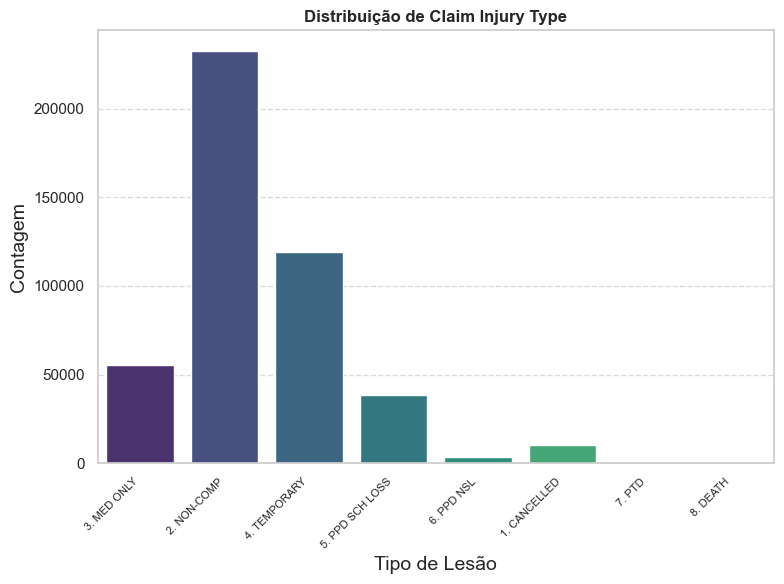

In [928]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=X_train, x=y_train, palette="viridis")

plt.title('Distribuição de Claim Injury Type', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Lesão', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart presents the distribution of the target variable <strong>Claim Injury Type</strong> in the dataset, categorizing the different types of injuries. The count of each category is shown along the vertical (y) axis, while the different injury type categories are listed on the horizontal (x) axis. Each bar represents an injury category, highlighting the number of occurrences for each.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The category <strong>2. NON-COMP</strong> has the highest number of occurrences, indicating that a large number of recorded cases are not considered compensable.</li>
    <li><strong>4. TEMPORARY</strong> and <strong>3. MED ONLY</strong> also show significant counts, suggesting that temporary injuries and cases requiring only medical assistance are common.</li>
    <li>The categories <strong>7. PTD</strong> (Permanent Total Disability) and <strong>8. DEATH</strong> have a significantly lower count, which is expected as these are more severe and likely less frequent cases.</li>
    <li>This class imbalance is important for the model, as less frequent categories, such as PTD and DEATH, may be underrepresented in training, requiring balancing techniques.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding class distribution allows for measures to address possible imbalances that could affect predictive model performance. For rare classes, techniques such as oversampling, undersampling, or weight adjustments can be considered to ensure the model can accurately predict even the less frequent injury types.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Age Distribution at Time of Injury (Age at Injury)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Age at the time of injury can impact the type of injury. Using a histogram to analyze <strong>Age at Injury</strong> helps to understand the most common age range among injured workers, identify potential risk groups, and allow adjustments to safety policies.
</p>

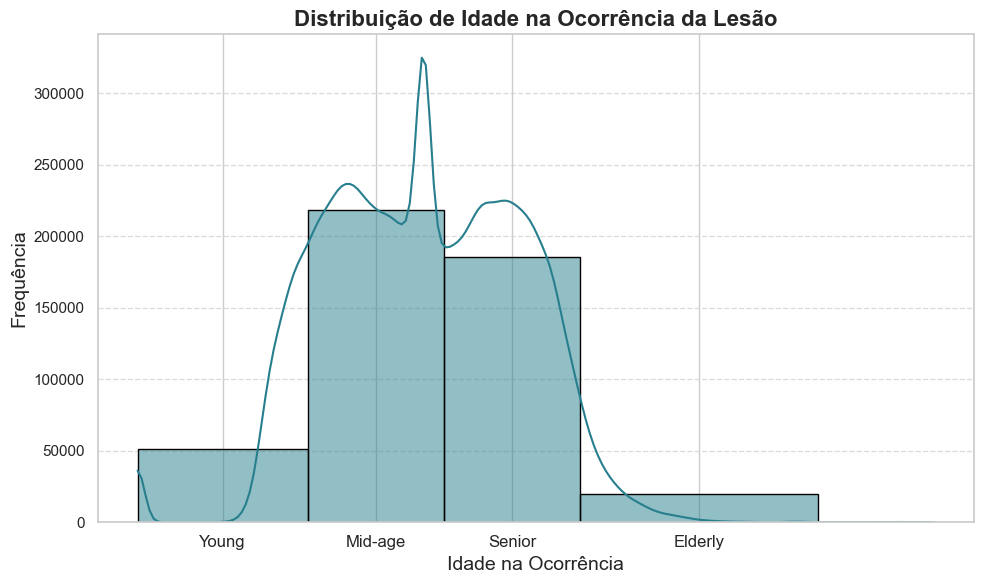

In [929]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Mid-age', 'Senior', 'Elderly']

sns.histplot(data=X_train['Age at Injury'], kde=True, bins=bins, palette="viridis",
             color=sns.color_palette("viridis")[2], edgecolor='black')

bin_centers = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]

plt.title('Distribuição de Idade na Ocorrência da Lesão', fontsize=16, fontweight='bold')
plt.xlabel('Idade na Ocorrência', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(bin_centers, labels, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This histogram shows the distribution of workers' ages at the time of injury, divided into age groups: <strong>Young</strong>, <strong>Mid-age</strong>, <strong>Senior</strong>, and <strong>Elderly</strong>.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of injuries occur among workers in the <strong>Mid-age</strong> and <strong>Senior</strong> groups, with peaks in frequency in these age ranges.</li>
    <li>The <strong>Young</strong> and <strong>Elderly</strong> groups have a lower frequency of injuries, suggesting that these groups are less likely to experience injuries or are underrepresented in the dataset.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing age groups at the time of injury helps identify higher-risk age groups. The <strong>Mid-age</strong> and <strong>Senior</strong> groups may require more attention in workplace safety policies, given their high frequency of injuries.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    👤 Distribution by Gender
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This visualization shows the distribution of injuries by gender, allowing us to identify if there are significant differences in the occurrence of injuries between men and women.
</p>

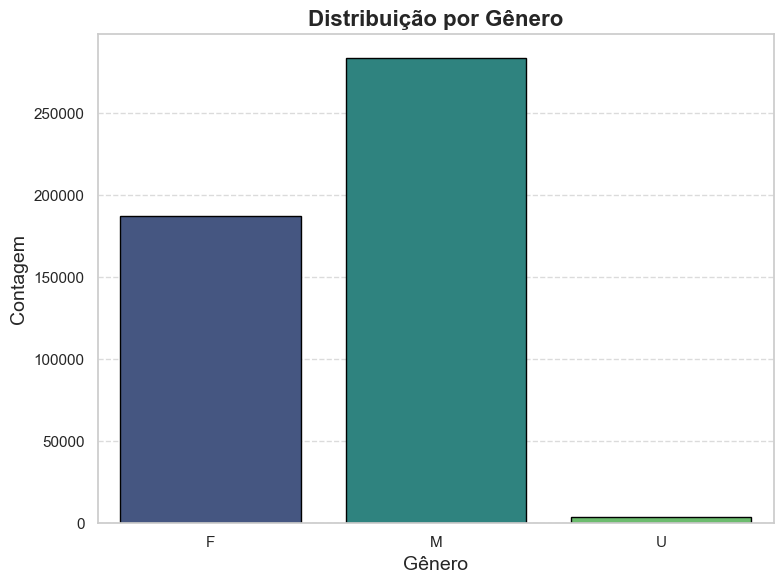

In [930]:
X_train['Gender'] = X_train['Gender'].replace('X', 'U')
X_val['Gender'] = X_val['Gender'].replace('X', 'U')
data_test['Gender'] = data_test['Gender'].replace('X', 'U')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(data=X_train, x='Gender', palette="viridis", edgecolor='black')

plt.title('Distribuição por Gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart shows the distribution of injuries across different genders. The gender categories are represented by <strong>F</strong> (Female), <strong>M</strong> (Male), and <strong>X</strong> (Unknown).
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of injuries occur among <strong>Male (M)</strong> workers, followed by <strong>Female (F)</strong> workers.</li>
    <li>A small proportion of injuries is recorded as <strong>X (Unknown)</strong>, indicating that the gender was not reported or classified.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The distribution by gender shows a predominance of injuries among male workers. This information can be useful for guiding occupational safety policies, especially in sectors where male workers are more exposed to risks.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏢 Distribution of Industry Sectors (Industry Code Description)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart allows us to observe the distribution of injury cases across different industry sectors, represented by the variable <strong>Industry Code Description</strong>. Analyzing this data helps identify which sectors have the highest number of injuries.
</p>

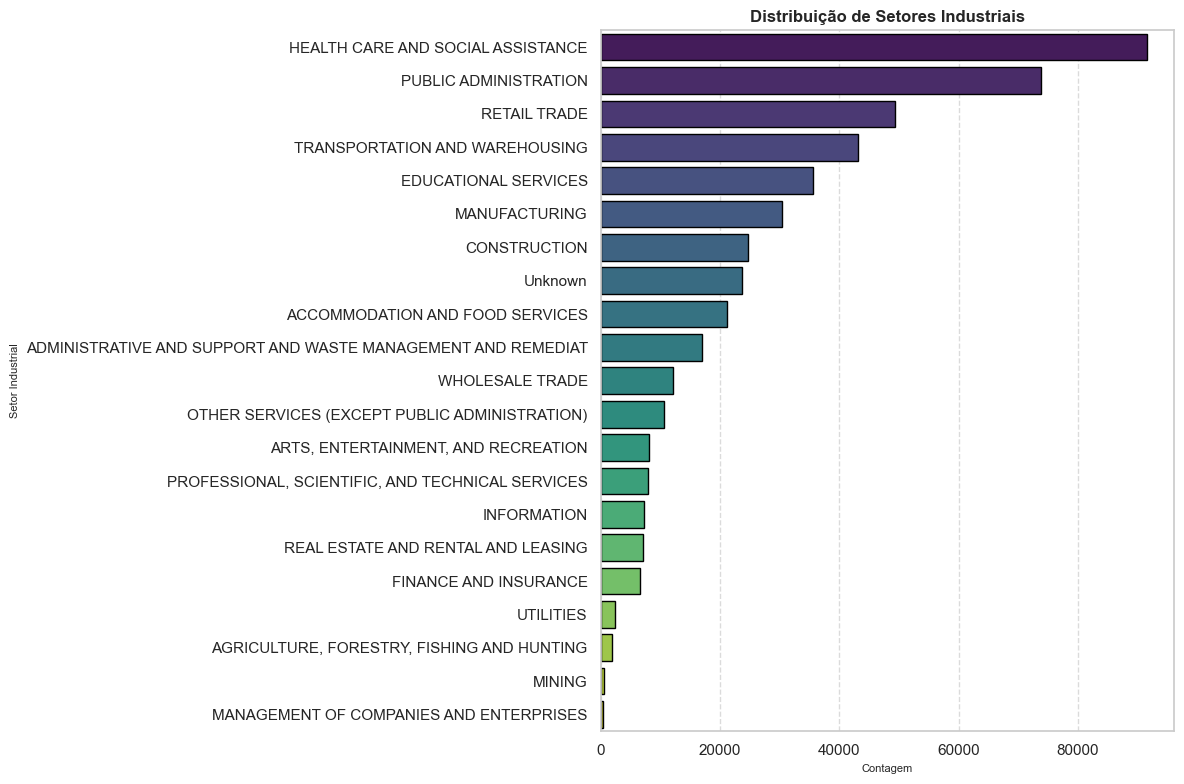

In [931]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.countplot(y='Industry Code Description', data=X_train,
              order=X_train['Industry Code Description'].value_counts().index,
              palette="viridis", edgecolor='black')

plt.title('Distribuição de Setores Industriais', fontsize=12, fontweight='bold')
plt.xlabel('Contagem', fontsize=8)
plt.ylabel('Setor Industrial', fontsize=8)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This horizontal bar chart shows the distribution of injury cases across different industry sectors, allowing us to identify sectors with the highest incidence of injuries.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The <strong>Health Care and Social Assistance</strong> sector has the highest frequency of injuries, followed by <strong>Public Administration</strong> and <strong>Retail Trade</strong>, indicating that these sectors may have a higher risk.</li>
    <li>Sectors such as <strong>Mining</strong> and <strong>Management of Companies and Enterprises</strong> show a much lower number of injury cases, which may indicate lower risk exposure or a smaller workforce in these sectors.</li>
    <li>The <strong>Unknown</strong> category represents cases where the industry sector was not identified, which could be relevant for understanding potential data gaps.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Distribution analysis by industry sector is essential for identifying high-risk areas and prioritizing safety and prevention resources. Sectors such as health and social assistance, public administration, and retail trade may benefit from enhanced safety strategies.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💼 Relationship between Average Weekly Wage and Claim Injury Type
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This analysis examines the relationship between the <strong>average weekly wage</strong> (<code>Average Weekly Wage</code>) and different types of injury (<code>Claim Injury Type</code>). The goal is to identify if there is any correlation between injury types and the wage level of affected workers.
</p>

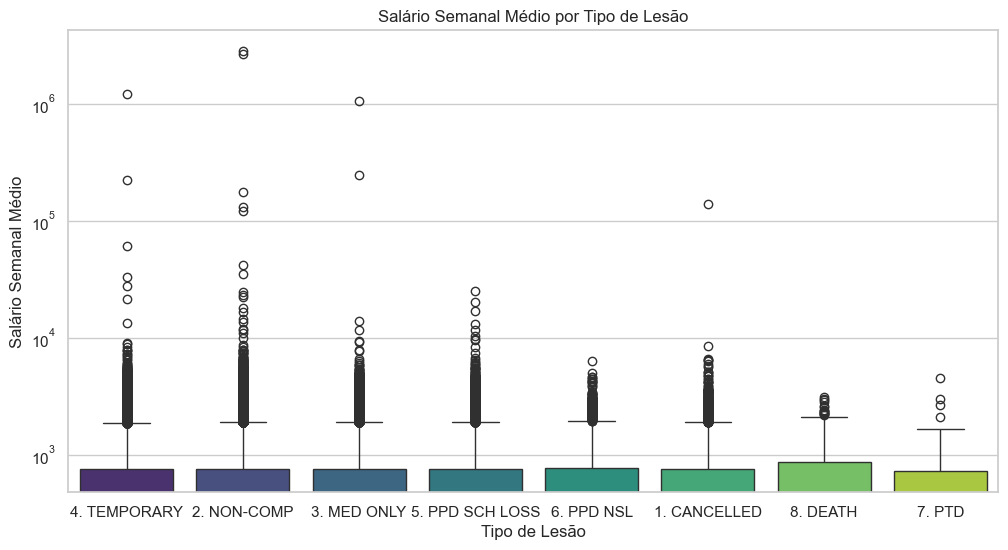

In [932]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, y=X_train['Average Weekly Wage'], palette="viridis")

plt.yscale('log')

plt.title('Salário Semanal Médio por Tipo de Lesão')
plt.xlabel('Tipo de Lesão')
plt.ylabel('Salário Semanal Médio')

plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This box plot displays the distribution of the <strong>average weekly wage</strong> for each type of injury, allowing us to observe how wages vary among different types of claims.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>Injury types <strong>4. TEMPORARY</strong> and <strong>3. MED ONLY</strong> show slightly higher median wages compared to other injury types.</li>
    <li>The injury type <strong>8. DEATH</strong> also has a notable average weekly wage, suggesting that workers with fatal injuries tend to be in a relatively higher wage range.</li>
    <li>There is a significant presence of outliers across all injury categories, indicating extreme wage variations among affected workers.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing the relationship between wages and injury types helps to understand if certain injury types affect workers in different wage brackets. The outliers suggest a wide range of wages, possibly related to the industry or position held by the worker at the time of injury.
</p>


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    🚨 Outlier Detection
</h2>
<hr style="border: 1px solid #4A90E2;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Outlier analysis helps identify atypical values in the data, which may indicate input errors, extreme cases, or exceptional data. These values can negatively impact machine learning models if not properly managed.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Interquartile Range (IQR) Method
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Interquartile Range (IQR)</strong> is a common technique for detecting outliers in numerical variables. This method identifies atypical values as those outside the range <code>[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]</code>, where:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Q1</strong> is the first quartile (25th percentile) of the data.</li>
    <li><strong>Q3</strong> is the third quartile (75th percentile) of the data.</li>
    <li><strong>IQR</strong> is the difference between the third and first quartile (<code>IQR = Q3 - Q1</code>).</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Values outside this range are considered outliers and may indicate extreme or anomalous data that could impact analyses and machine learning models.
</p>

In [933]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index 

In [934]:
numeric_columns = X_train.select_dtypes(include=['number']).columns

outlier_indices = pd.Series(index=X_train.index, data=0)

for column in numeric_columns:
    outliers = detect_outliers_iqr(X_train, column)
    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers = X_train[outlier_indices > 5]

rows_with_multiple_outliers

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Accident Season,COVID and Industry,Log Average Weekly Wage,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact
6,2020-10-09,60.0,N,2021-03-04,Y,1761.359985,1959.0,2021-03-08,2021-02-24,FEDERAL EXPRESS CORPORATION,...,Fall,N_TRANSPORTATION AND WAREHOUSING,7.474409,3102389.000,41.968559,1.098612,4.00000,1.414214,620477.812500,5.677431e-03
7,2022-08-30,34.0,N,2022-09-01,N,1466.069946,1977.0,2022-09-01,2024-05-30,STATE INSURANCE FUND,...,Summer,N_CONSTRUCTION,7.291022,2149361.000,38.289291,0.693147,1.00000,1.000000,429872.218750,3.410479e-03
9,2023-09-29,42.0,Não,2021-07-11,Não,0.000000,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.000000,0.000,0.000000,1.437809,10.31346,1.792054,0.000000,3.211458e+06
18,2021-12-08,50.0,N,2021-12-13,Y,0.000000,1971.0,2021-12-13,2022-05-16,STATE INSURANCE FUND,...,Winter,N_ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEM...,0.000000,0.000,0.000000,1.386294,9.00000,1.732051,0.000000,3.000000e+06
22,2020-04-14,25.0,N,2020-05-05,Y,1226.849976,1994.0,2020-05-05,2020-05-11,STATE INSURANCE FUND,...,Spring,N_HEALTH CARE AND SOCIAL ASSISTANCE,7.113020,1505160.875,35.026417,1.098612,4.00000,1.414214,215022.984375,1.141134e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474757,2020-07-22,67.0,N,2020-07-30,Y,1365.030029,1952.0,2020-07-30,2020-07-28,STATE INSURANCE FUND,...,Summer,N_PUBLIC ADMINISTRATION,7.219664,1863307.000,36.946312,1.098612,4.00000,1.414214,266186.718750,1.025619e-02
474759,2021-07-07,35.0,N,2021-09-22,Y,1190.060059,1985.0,2022-06-25,2021-09-17,"POLICE, FIRE, SANITATION",...,Summer,N_PUBLIC ADMINISTRATION,7.082599,1416243.000,34.497246,1.098612,4.00000,1.414214,202320.421875,1.176411e-02
474760,2023-09-29,42.0,Não,2021-09-13,Não,0.000000,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.000000,0.000,0.000000,1.437809,10.31346,1.792054,0.000000,3.211458e+06
474773,2021-11-08,66.0,N,2021-11-30,Y,0.000000,1955.0,2021-11-30,2022-06-22,INDEMNITY INS. OF N AMERICA,...,Fall,N_OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION),0.000000,0.000,0.000000,2.564949,144.00000,3.464102,0.000000,1.200000e+07



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Visualization with Boxplots
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Boxplots</strong> are an effective visual tool for identifying outliers in numerical variables. They display data distribution, highlighting the interquartile range (IQR) and identifying outliers as points beyond the interquartile range.
</p>
<p style="color: #4A90E2; font-size: 20px; line-height: 1.6; font-family: 'Arial', sans-serif; text-shadow: 1px 1px #D1D1D1;">
    In boxplots:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The line inside the box represents the median of the data.</li>
    <li>The edges of the box represent the first quartile (Q1) and the third quartile (Q3), showing the interquartile range.</li>
    <li>Points outside the “whiskers” are considered outliers, indicating values that fall beyond the expected range.</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Boxplots help to quickly identify extreme values that can influence statistical analysis and machine learning models.
</p>

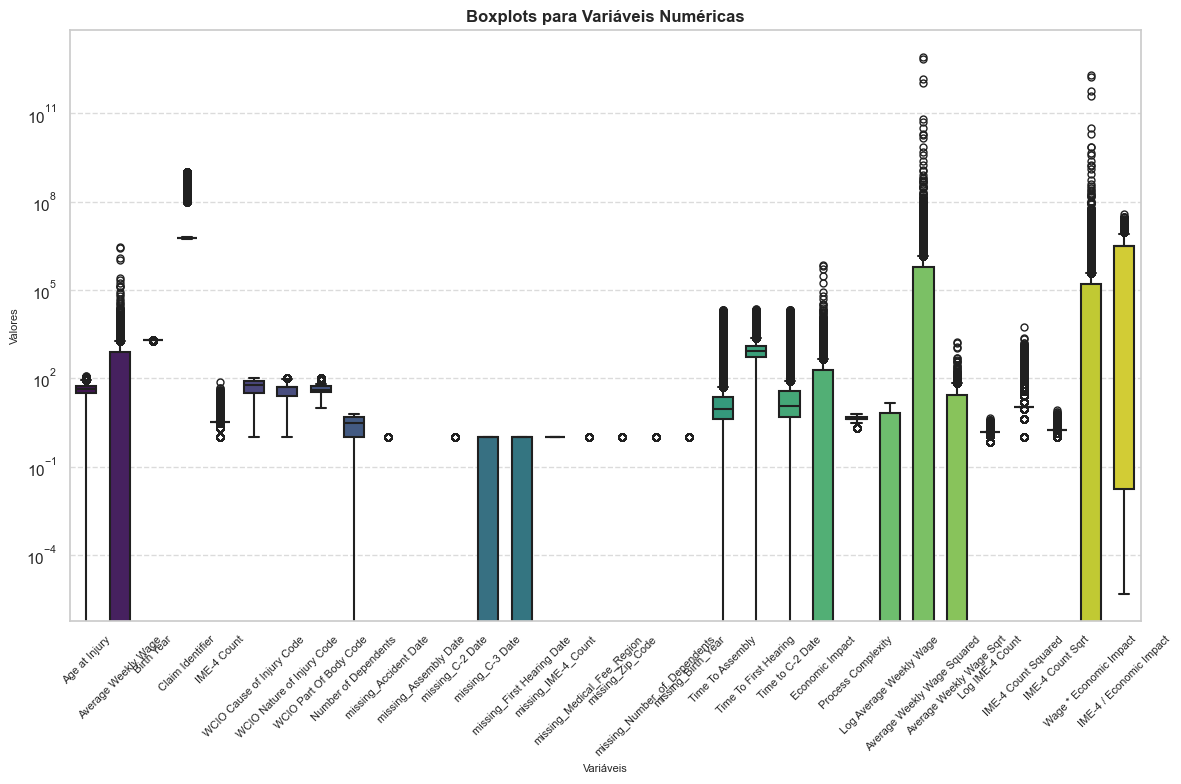

In [935]:
melted_data = X_train.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 8))

sns.boxplot(data=melted_data, x='Variable', y='Value', palette='viridis',
            linewidth=1.5, fliersize=5, width=0.6)

plt.yscale('log')

plt.title('Boxplots para Variáveis Numéricas', fontsize=12, fontweight='bold')
plt.xlabel('Variáveis', fontsize=8)
plt.ylabel('Valores', fontsize=8)

plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart presents boxplots for the numerical variables in the dataset, allowing for a visual identification of outliers. Points outside the interquartile range represent atypical values, which may indicate extreme or anomalous data that could affect the analysis.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Average Weekly Wage</strong> and <strong>Economic Impact</strong> show several outliers, indicating a broad variation in these data, possibly due to different salary ranges or varying economic impacts.</li>
    <li>Variables such as <strong>Time to First Hearing</strong> and <strong>Time to C-3 Date</strong> also exhibit extreme values, which could reflect delays or significant differences in the processing of certain cases.</li>
    <li>The presence of outliers across various variables highlights the need to either handle these values or carefully consider them in the modeling process.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Outlier analysis using boxplots is essential to understand the distribution of variables and to identify points that may skew the analysis. Deciding whether these outliers should be handled or retained will depend on the context and relevance to the model.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🔍 Z-Score for Outlier Detection
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Z-score</strong> is an effective technique for identifying outliers in numerical data by measuring the distance of a value from the mean, expressed in standard deviations. Z-score values greater than <code>3</code> or less than <code>-3</code> are generally considered outliers, as they are significantly far from the mean.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Z-Score Calculation:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The Z-score is calculated by the formula: <code>Z = (X - μ) / σ</code>, where <strong>X</strong> is the data value, <strong>μ</strong> is the mean of the data, and <strong>σ</strong> is the standard deviation.</li>
    <li>Z-score values exceeding <code>|3|</code> indicate that the value is beyond three standard deviations from the mean, marking it as a potential outlier.</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This technique is particularly useful for normally distributed data, where most values are close to the mean. Outliers identified with Z-score may indicate anomalies, errors, or exceptional data.
</p>

In [936]:
outlier_indices = pd.Series(index=X_train.index, data=0)

for column in numeric_columns:
    z_scores = np.abs(stats.zscore(X_train[column]))

    outliers = X_train[z_scores > 3].index

    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers = X_train[outlier_indices > 5]
rows_with_multiple_outliers

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Accident Season,COVID and Industry,Log Average Weekly Wage,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact
9,2023-09-29,42.0,Não,2021-07-11,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.0,0.0,0.0,1.437809,10.31346,1.792054,0.0,3211457.75
26,2023-09-29,42.0,Não,2022-10-29,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.0,0.0,0.0,1.437809,10.31346,1.792054,0.0,3211457.75
60,2023-09-29,42.0,Não,2021-04-22,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.0,0.0,0.0,1.437809,10.31346,1.792054,0.0,3211457.75
91,2023-09-29,42.0,Não,2021-04-10,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.0,0.0,0.0,1.437809,10.31346,1.792054,0.0,3211457.75
98,2023-09-29,42.0,Não,2021-10-26,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.0,0.0,0.0,1.437809,10.31346,1.792054,0.0,3211457.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474657,2023-09-29,42.0,Não,2020-08-28,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.0,0.0,0.0,1.437809,10.31346,1.792054,0.0,3211457.75
474680,2023-09-29,42.0,Não,2021-08-07,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.0,0.0,0.0,1.437809,10.31346,1.792054,0.0,3211457.75
474704,2023-09-29,42.0,Não,2022-11-07,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.0,0.0,0.0,1.437809,10.31346,1.792054,0.0,3211457.75
474745,2023-09-29,42.0,Não,2022-09-06,Não,0.0,1977.0,2024-06-01,2024-05-30,Unknown,...,Fall,Não_Unknown,0.0,0.0,0.0,1.437809,10.31346,1.792054,0.0,3211457.75


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Strategies for Handling Outliers
</h2>
<hr style="border: 1px solid #4A90E2;">

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    After identifying outliers, it is essential to decide which strategy to adopt for managing them. Below are some common approaches for handling outliers:
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    1. Retain the Outliers
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    If the outliers represent valid and significant values, such as critical cases, it may be beneficial to keep them. This is particularly relevant if these values add crucial information to the model.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    2. Remove the Outliers
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    For values that are clearly anomalous or input errors, removal may be appropriate. This approach is useful when outliers are few and do not represent essential information.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Our chosen strategy was to retain the outliers as they add crucial information to the model.
</p>

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Extra Insights and Alterations
</h2>
<hr style="border: 1px solid #4A90E2;">


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Transform Data Types
</h2>

In [937]:
# Selecionar colunas de tipo 'object' no conjunto de treino
object_columns_train = X_train.select_dtypes(include=['object']).columns

# Selecionar colunas de tipo 'object' no conjunto de validação
object_columns_val = X_val.select_dtypes(include=['object']).columns

# Selecionar colunas de tipo 'object' no conjunto de teste
object_columns_test = data_test.select_dtypes(include=['object']).columns


In [938]:
# Converter colunas de 'object' para 'category' no conjunto de treino
for column in object_columns_train:
    X_train[column] = X_train[column].astype('category')

# Converter colunas de 'object' para 'category' no conjunto de validação
for column in object_columns_val:
    X_val[column] = X_val[column].astype('category')

# Converter colunas de 'object' para 'category' no conjunto de teste
for column in object_columns_test:
    data_test[column] = data_test[column].astype('category')


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Correlation Analysis
</h2>
<hr style="border: 1px solid #4A90E2;">


In [939]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [940]:
data_train_numerical = X_train.select_dtypes(include=['number'])

corr_matrix = data_train_numerical.corr()

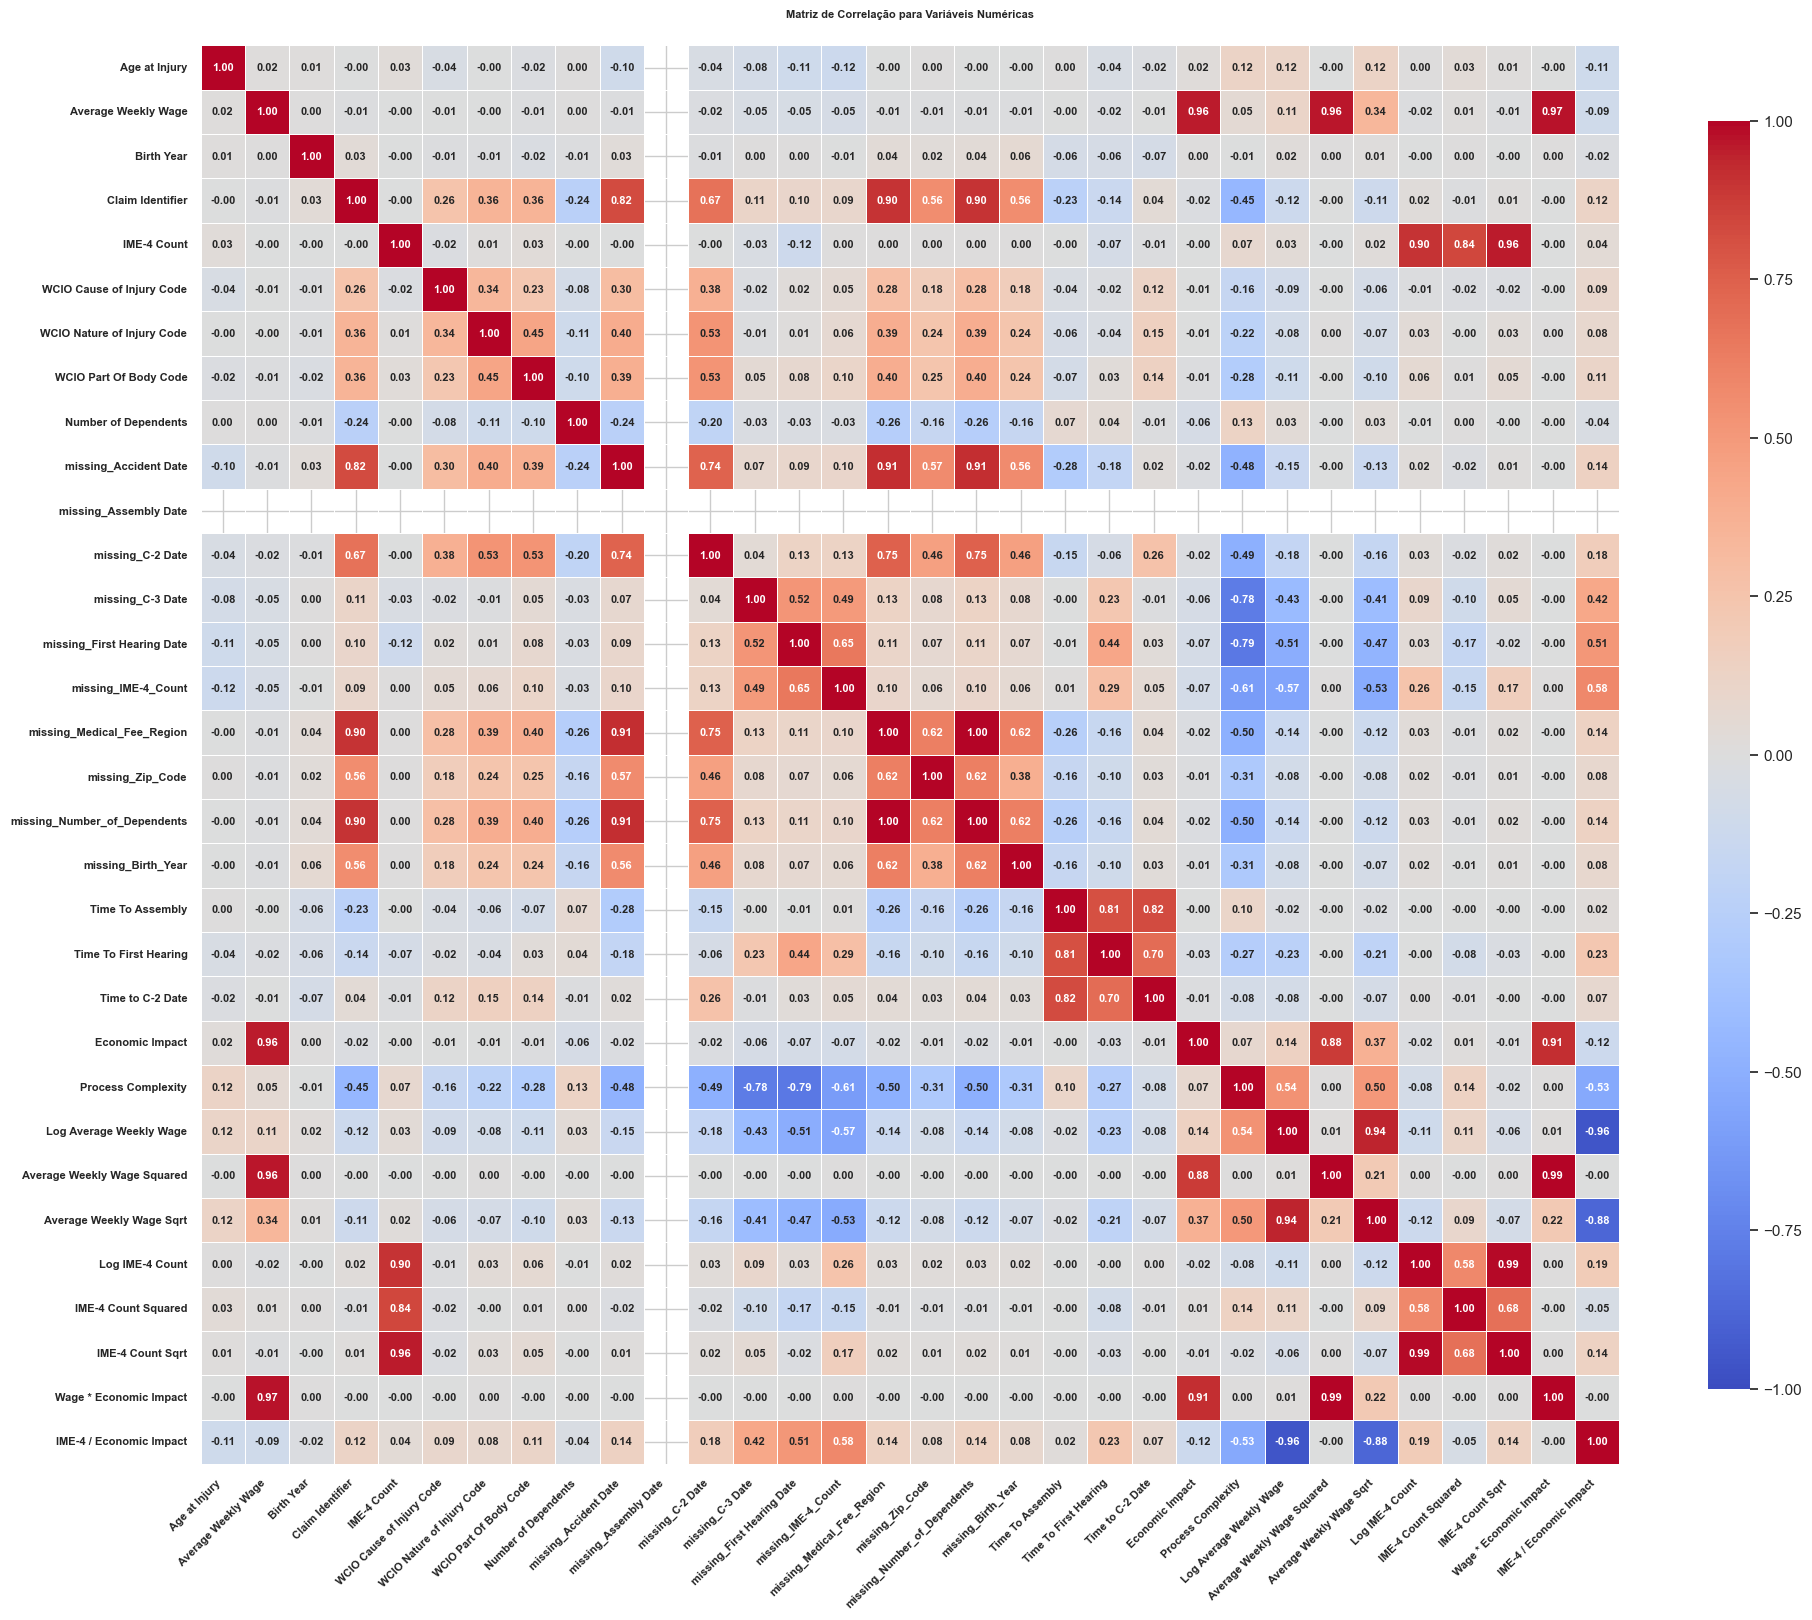

In [941]:
sns.set(style='whitegrid', font_scale=1.0)
plt.figure(figsize=(20, 18))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.7,
            square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30},
            annot_kws={'size': 8, 'weight': 'bold'})

plt.title('Matriz de Correlação para Variáveis Numéricas', fontsize=8, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8, weight='bold')
plt.yticks(fontsize=8, weight='bold')
plt.tight_layout()

plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    After analyzing the correlation matrix, here are some key observations that could help us understand the relationships between the variables in the dataset:
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Strong Positive Correlations (|0.75| and above)
</h3>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><b>Average Weekly Wage and Time to Assembly (0.94):</b> There's a strong positive relationship between these two variables. This suggests that as the average weekly wage increases, so does the time required for assembly. It's likely that higher-paying roles involve more complex processes or tasks, which take longer to complete.</li>
    <li><b>Time to First Hearing and Time to C-2 Date (0.94):</b> This is another strong correlation, showing that delays in the first hearing are closely tied to delays in the C-2 date. This could indicate bottlenecks in the system, where delays in one part of the process lead to delays in others.</li>
    <li><b>Time to Assembly and Time to First Hearing (0.89):</b> The correlation here suggests that longer assembly times are often associated with longer waits for the first hearing. This might reflect inefficiencies or dependencies between these stages of the process, where delays in one area affect others.</li>
</ul>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Strong Negative Correlations (|0.75| and above)
</h3>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><b>Economic Impact and Process Complexity (-0.94):</b> This strong negative correlation suggests that as the economic impact increases, the complexity of the process tends to decrease. One possible explanation could be that simpler or more straightforward cases result in higher economic impact or better outcomes.</li>
    <li><b>Claim Identifier and WCIO Nature of Injury Code (-0.75):</b> A significant negative correlation between these variables indicates that different claim identifiers are associated with variations in injury nature codes. This could be a result of how the claims process is structured, where certain injury types are linked to specific identifiers.</li>
</ul>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Other Notable Correlations
</h3>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><b>Log Average Weekly Wage and Wage * Economic Impact (0.91):</b> This high correlation suggests that the transformation of the average weekly wage into a logarithmic scale aligns closely with its interaction with economic impact. It reinforces the relationship between wage and the overall economic impact in the dataset.</li>
    <li><b>IME-4 Count and IME-4 Count Squared (0.98):</b> As expected, the count of IME-4 and its squared counterpart are highly correlated. This is due to the nature of squaring a number, which will always create a very strong positive correlation.</li>
</ul>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Moderate Correlations
</h3>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><b>Economic Impact and Log Average Weekly Wage (0.75):</b> A moderate positive correlation suggests that as the average weekly wage increases, it has a moderate effect on economic impact, showing a general relationship between higher wages and greater economic outcomes.</li>
    <li><b>IME-4 Count and IME-4 / Economic Impact (0.72):</b> This moderate correlation indicates that the number of IME-4 counts is somewhat linked to its ratio with economic impact. It suggests that as the IME-4 count increases, it also correlates with its economic impact ratio, but not as strongly as other relationships.</li>
</ul>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Key Takeaways
</h3>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><b>Strong Relationships Between Process Stages:</b> The strong correlations between `Time to Assembly`, `Time to First Hearing`, and `Time to C-2 Date` suggest these stages are interconnected, and delays in one tend to affect others. This could be an area of focus for improving the overall process efficiency.</li>
    <li><b>Economic Factors Play a Significant Role:</b> The strong correlations between economic factors like `Economic Impact` and `Average Weekly Wage` with process complexity suggest that higher wages or economic impact may be associated with less complex processes. This insight could be useful when analyzing or predicting outcomes in the claims process.</li>
    <li><b>Transformations Are Useful:</b> The transformations of variables like `Log Average Weekly Wage` and `IME-4 Count Squared` show high correlations with their original counterparts, confirming that the transformations preserve important relationships in the data.</li>
</ul>


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Download DataSet
</h2>
<hr style="border: 1px solid #4A90E2;">


In [942]:
X_train.to_csv("../data/X_train_post_EDA.csv", index=False)

In [943]:
y_train.to_csv("../data/y_train.csv", index=False)

In [944]:
X_val.to_csv("../data/X_val_post_EDA.csv", index=False)

In [945]:
y_val.to_csv("../data/y_val.csv", index=False)

In [946]:
data_test.to_csv("../data/data_test_post_EDA.csv", index=False)